# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [1]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

---
---

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [6]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

    ### your implementation for bubble sort goes here 
    def sort(self):
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        for i in range(n):
            swapped = False
    
            for j in range(0, n-i-1):
                if self.sorted_items[j] > self.sorted_items[j+1]:
                    self.sorted_items[j], self.sorted_items[j+1] = self.sorted_items[j+1], self.sorted_items[j]
                    swapped = True
            if (swapped == False):
                break
        
    def get_sorted(self,):
        return self.sorted_items

In [7]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

       ### your implementation for insertion sort goes here 
    def sort(self):
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        for i in range(1, n):
            key = self.sorted_items[i]
            j = i-1
            while j >= 0 and key < self.sorted_items[j] :
                    self.sorted_items[j + 1] = self.sorted_items[j]
                    j -= 1
            self.sorted_items[j + 1] = key
                
    def get_sorted(self,):
        return self.sorted_items

In [8]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

       ### your implementation for selection sort goes here 
    def sort(self):
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        for i in range(n):
            min_index = i 
            for j in range(i+1, n): 
                if self.sorted_items[min_index] > self.sorted_items[j]: 
                    min_index = j 
                    
            self.sorted_items[i], self.sorted_items[min_index] = self.sorted_items[min_index], self.sorted_items[i] 
            
    def get_sorted(self,):
        return self.sorted_items

___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [2]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

In [3]:
def draw_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

In [69]:
### Bubble sort experiment code goes here
### Bubble sort experiment code goes here
def bubble_sort_experiment(N, list_length, max_value):
    timings = []

    batches_bubble = N // 500
    for _ in range(batches_bubble):
        batch_timings_bubble = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            bubble_sort = BubbleSort(custom_list)
            bubble_sort.sort()
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings_bubble.append(execution_time)
        
        average_time = np.mean(batch_timings_bubble)
        timings.append(average_time)

    draw_plot(timings)

N = 10000
list_length = 1000
max_value = 1000
bubble_sort_experiment(N, list_length, max_value)

NameError: name 'BubbleSort' is not defined

In [ ]:
### Insertion sort experiment code goes here
def insertion_sort_experiment(N, list_length, max_value):
    timings = []
    batches_insertion = N // 500
    for _ in range(batches_insertion):
        batch_timings_insertion = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            insertion_sort = InsertionSort(custom_list)
            insertion_sort.sort()
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings_insertion.append(execution_time)
        
        average_time = np.mean(batch_timings_insertion)
        timings.append(average_time)

    draw_plot(timings)

N = 10000
list_length = 1000
max_value = 1000
insertion_sort_experiment(N, list_length, max_value)

In [9]:
### Selection sort experiment code goes here
def selection_sort_experiment(N, list_length, max_value):
    timings = []
    batches_selection = N // 500
    for _ in range(batches_selection):
        batch_timings_selection = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            selection_sort = SelectionSort(custom_list)
            selection_sort.sort()
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings_selection.append(execution_time)
        
        average_time = np.mean(batch_timings_selection)
        timings.append(average_time)

    draw_plot(timings)

N = 10000
list_length = 1000
max_value = 1000
selection_sort_experiment(N, list_length, max_value)

You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:


---

##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

In [8]:
def draw_line_chart(list_sizes, timings, title):
    plt.plot(list_sizes, timings, label='Algorithmic time')
    plt.xlabel('List Size')
    plt.ylabel('Time Taken (seconds)')
    plt.title(title)
    plt.legend()
    plt.show()

In [9]:

list_sizes = [i for i in range(1, 1000)]
max_value = 100000
timings = []
for size in list_sizes:
    custom_list = create_custom_list(size, max_value)
    start_time = time.time()
    bubble_sort = BubbleSort(custom_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    timings.append(execution_time)
draw_line_chart(list_sizes, timings, 'Bubble Sort')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/aaravpant01/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1800/1561602802.py", line 8, in <module>
    bubble_sort.sort()
  File "/tmp/ipykernel_1800/3255047841.py", line -1, in sort
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/aaravpant01/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/aaravpant01/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/aaravpant01/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1326, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/h

In [10]:
### Selection sort experiment code goes here
### Insertion sort experiment code goes here
list_sizes = [i for i in range(1, 1000)]
max_value = 100000
timings = []
for size in list_sizes:
    custom_list = create_custom_list(size, max_value)
    start_time = time.time()
    bubble_sort = InsertionSort(custom_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    timings.append(execution_time)
draw_line_chart(list_sizes, timings, 'Insertion Sort')

KeyboardInterrupt: 

In [ ]:
list_sizes = [i for i in range(1, 1000)]
max_value = 100000
timings = []
for size in list_sizes:
    custom_list = create_custom_list(size, max_value)
    start_time = time.time()
    bubble_sort = SelectionSort(custom_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    timings.append(execution_time)
draw_line_chart(list_sizes, timings, 'Selection Sort')

Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :

---

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS: 

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907). 

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here. 

In [11]:
### Bubble sort experiment code goes here
def generate_near_sorted(near_sorted_list):
    near_sorted_list_length = len(near_sorted_list)
    swapped = [False for _ in range(near_sorted_list_length)]
    """print(swapped)"""
    for i in range(near_sorted_list_length - 20, near_sorted_list_length-1):
        """print("Curr iteration", i)
        print("Curr value of list", near_sorted_list[i])
        print("Next value of list", near_sorted_list[i+1])"""
        if(swapped[i] != True):
            near_sorted_list[i], near_sorted_list[i+1] = near_sorted_list[i+1], near_sorted_list[i]
            """print("Swapped Curr value of list", near_sorted_list[i])
            print("Swapped Next value of list", near_sorted_list[i+1])"""
            swapped[i] = True
            swapped[i+1] = True
    return near_sorted_list

In [12]:
### Selection sort experiment code goes here
def remove_duplicates(input_list):
    seen = set()
    result = []
    for item in input_list:
        if item not in seen:
            result.append(item)
            seen.add(item)
    return result

In [13]:
num_of_times_to_run_algo = 100


unsorted_list = remove_duplicates(create_custom_list(100, 100))
sorted_list = sorted(unsorted_list)
near_sorted_list = sorted_list.copy()
print("Unsorted List", unsorted_list)
"""print("Is unsorted list sorted:", sorted(unsorted_list) == unsorted_list)
print("Is sorted list sorted:", sorted(sorted_list) == sorted_list)"""
print("Sorted List", sorted_list)
"""print("Sorted_list_length", sorted_list_length)"""
"""print(swapped)"""

near_sorted_list = generate_near_sorted(near_sorted_list)

"""print("Is sorted list still sorted:", sorted(sorted_list) == sorted_list)"""
print("Near sorted list", near_sorted_list)

Unsorted List [90, 51, 95, 53, 97, 32, 44, 42, 25, 77, 63, 83, 8, 34, 22, 15, 19, 69, 30, 16, 47, 36, 39, 73, 68, 45, 57, 61, 14, 17, 28, 11, 2, 7, 67, 96, 99, 29, 60, 59, 93, 70, 40, 79, 98, 18, 55, 65, 86, 35, 31, 84, 66, 76, 89, 58, 94, 80, 9, 21, 85]
Sorted List [2, 7, 8, 9, 11, 14, 15, 16, 17, 18, 19, 21, 22, 25, 28, 29, 30, 31, 32, 34, 35, 36, 39, 40, 42, 44, 45, 47, 51, 53, 55, 57, 58, 59, 60, 61, 63, 65, 66, 67, 68, 69, 70, 73, 76, 77, 79, 80, 83, 84, 85, 86, 89, 90, 93, 94, 95, 96, 97, 98, 99]
Near sorted list [2, 7, 8, 9, 11, 14, 15, 16, 17, 18, 19, 21, 22, 25, 28, 29, 30, 31, 32, 34, 35, 36, 39, 40, 42, 44, 45, 47, 51, 53, 55, 57, 58, 59, 60, 61, 63, 65, 66, 67, 68, 70, 69, 76, 73, 79, 77, 83, 80, 85, 84, 89, 86, 93, 90, 95, 94, 97, 96, 99, 98]


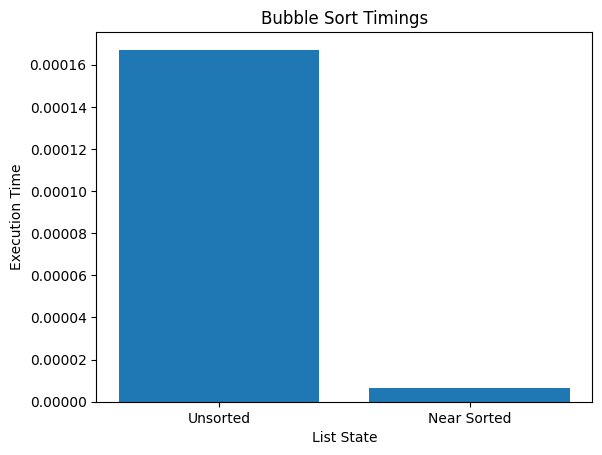

In [14]:
### Bubble sort experiment code goes here
timings_bubble_sort = []
#Experiment 1
time_exp1 = 0
count_exp1 = 0
for _ in range(num_of_times_to_run_algo):
    start_time = time.time()
    bubble_sort = BubbleSort(unsorted_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    time_exp1 += execution_time
    count_exp1 += 1

timings_bubble_sort.append(time_exp1/count_exp1)

#Experiment 2
time_exp2 = 0
count_exp2 = 0
for _ in range(num_of_times_to_run_algo):
    start_time1 = time.time()
    bubble_sort = BubbleSort(near_sorted_list)
    bubble_sort.sort()
    end_time1 = time.time()
    execution_time1 = end_time1 - start_time1
    time_exp2 += execution_time1
    count_exp2 += 1

timings_bubble_sort.append(time_exp2/count_exp2)

plt.bar(['Unsorted', 'Near Sorted'], timings_bubble_sort)
plt.xlabel('List State')
plt.ylabel('Execution Time')
plt.title('Bubble Sort Timings')
plt.show()


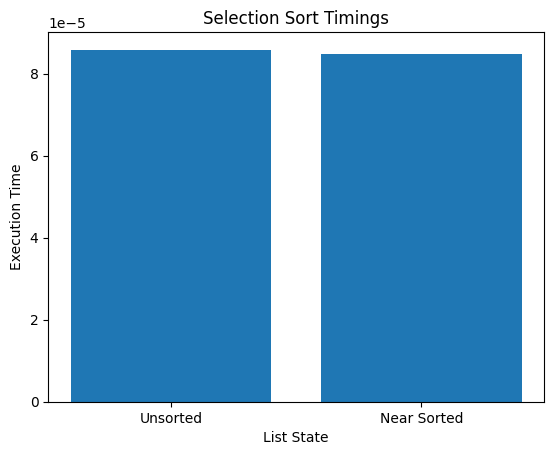

In [15]:
### Selection sort experiment code goes here
timings_selection_sort = []

#Experiment 3
time_exp3 = 0
count_exp3 = 0
for _ in range(num_of_times_to_run_algo):
    start_time = time.time()
    selection_sort = SelectionSort(unsorted_list)
    selection_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    time_exp3 += execution_time
    count_exp3 += 1
timings_selection_sort.append(time_exp3/count_exp3)

#Experiment 4
time_exp4 = 0
count_exp4 = 0
for _ in range(num_of_times_to_run_algo):
    start_time1 = time.time()
    selection_sort = SelectionSort(near_sorted_list)
    selection_sort.sort()
    end_time1 = time.time()
    execution_time1 = end_time1 - start_time1
    time_exp4 += execution_time1
    count_exp4 += 1
timings_selection_sort.append(time_exp4/count_exp4)


plt.bar(['Unsorted', 'Near Sorted'], timings_selection_sort)
plt.xlabel('List State')
plt.ylabel('Execution Time')
plt.title('Selection Sort Timings')
plt.show()

    

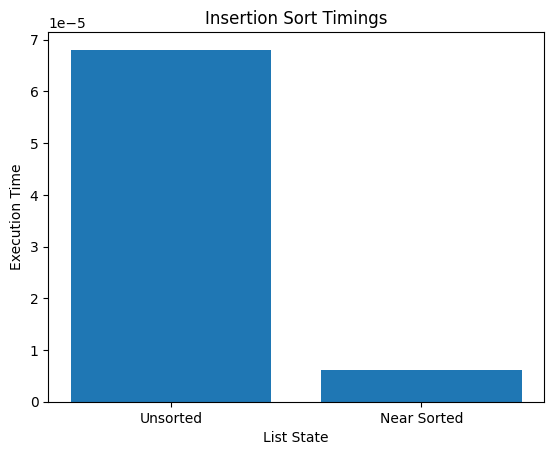

In [16]:
### Insertion sort experiment code goes here
timings_insertion_sort = []

#Experiment 5
time_exp5 = 0
count_exp5 = 0
for _ in range(num_of_times_to_run_algo):
    start_time = time.time()
    insertion_sort = InsertionSort(unsorted_list)
    insertion_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    time_exp5 += execution_time
    count_exp5 += 1
timings_insertion_sort.append(time_exp5/count_exp5)

#Experiment 6
time_exp6 = 0
count_exp6 = 0
for _ in range(num_of_times_to_run_algo):
    start_time1 = time.time()
    insertion_sort = InsertionSort(near_sorted_list)
    insertion_sort.sort()
    end_time1 = time.time()
    execution_time1 = end_time1 - start_time1
    time_exp6 += execution_time1
    count_exp6 += 1
timings_insertion_sort.append(time_exp6/count_exp6)


plt.bar(['Unsorted', 'Near Sorted'], timings_insertion_sort)
plt.xlabel('List State')
plt.ylabel('Execution Time')
plt.title('Insertion Sort Timings')
plt.show()

Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is? You woul

**Reflection** :

---
---

### Part B

In the class, we discussed three implementations of Binary Search. 

In [15]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [16]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [17]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:
1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.

In [18]:
## you experiment code goes here
n = 20
def plot_algorithm_performance(timings1, timings2, timings3, title="Binary Search Algorithms Performance on element at beginning of list"):
    n = len(timings1)
    x_values = [i for i in range(1, n+1)]

    plt.plot(x_values, timings1, label='Binary Search I')
    plt.plot(x_values, timings2, label='Binary Search II')
    plt.plot(x_values, timings3, label='Binary Search III')

    plt.xlabel('Iteration')
    plt.ylabel('Execution Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.show()

In [19]:
timings_beginning_Bsearch1 = []
timings_beginning_Bsearch2 = []
timings_beginning_Bsearch3 = []
timings_middle_Bsearch1 = []
timings_middle_Bsearch2 = []
timings_middle_Bsearch3 = []
timings_end_Bsearch1 = []
timings_end_Bsearch2 = []
timings_end_Bsearch3 = []

In [20]:
#Experiment :- Binary_search_I + At the beginning of the list
random_num_with_min = random.randint(1000, 2000)
new_list = [i for i in range(random_num_with_min)]
to_find = new_list[1]
print("Experiment:- Binary_search_I + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch1.append(execution_time)
    

Experiment:- Binary_search_I + At the beginning of the list


In [21]:
#Experiment :- Binary_search_II + At the beginning of the list
to_find = new_list[1]
print("Experiment:- Binary_search_II + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch2.append(execution_time)

Experiment:- Binary_search_II + At the beginning of the list


In [22]:
#Experiment :- Binary_search_III + At the beginning of the list
to_find = new_list[1]
print("Experiment:- Binary_search_III + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch3.append(execution_time)

Experiment:- Binary_search_III + At the beginning of the list


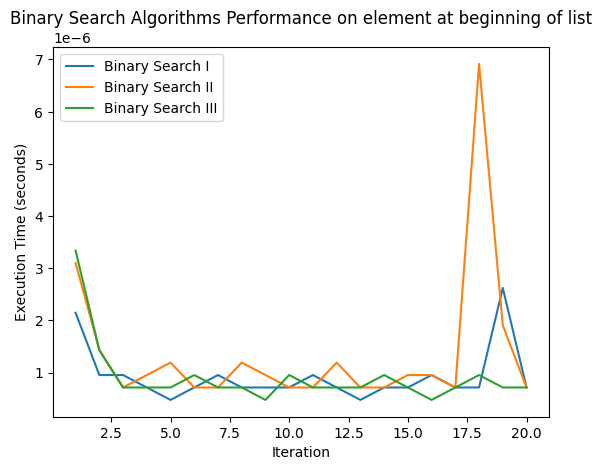

In [23]:
plot_algorithm_performance(timings_beginning_Bsearch1, timings_beginning_Bsearch2, timings_beginning_Bsearch3)

In [24]:
#Experiment :- Binary_search_I + At the middle of the list
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_I + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch1.append(execution_time)

Experiment:- Binary_search_I + At the middle of the list


In [25]:
#Experiment :- Binary_search_II + At the middle of the list
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_II + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch2.append(execution_time)

Experiment:- Binary_search_II + At the middle of the list


In [26]:
#Experiment :- Binary_search_III + At the middle of the list
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_III + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch3.append(execution_time)

Experiment:- Binary_search_III + At the middle of the list


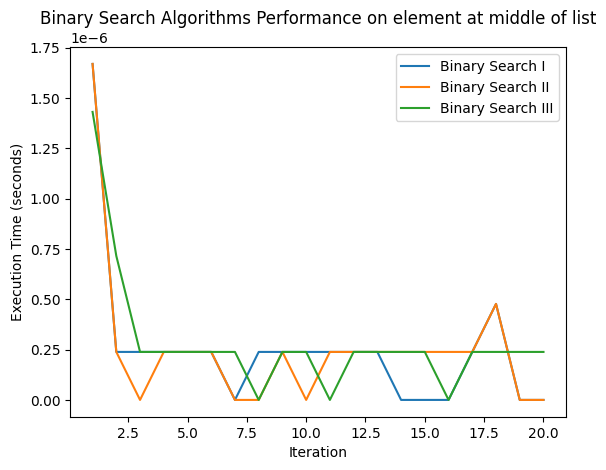

In [27]:
plot_algorithm_performance(timings_middle_Bsearch1, timings_middle_Bsearch2, timings_middle_Bsearch3, "Binary Search Algorithms Performance on element at middle of list")

In [28]:
#Experiment :- Binary_search_I + At the end of the list
end_element = new_list[-1]
start_time = time.time()
print("Experiment:- Binary_search_I + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch1.append(execution_time)

Experiment:- Binary_search_I + At the end of the list


In [29]:
#Experiment :- Binary_search_II + At the end of the list
end_element = new_list[-1]
print("Experiment:- Binary_search_II + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch2.append(execution_time)

Experiment:- Binary_search_II + At the end of the list


In [30]:
#Experiment :- Binary_search_III + At the end of the list
end_element = new_list[-1]
print("Experiment:- Binary_search_III + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch3.append(execution_time)

Experiment:- Binary_search_III + At the end of the list


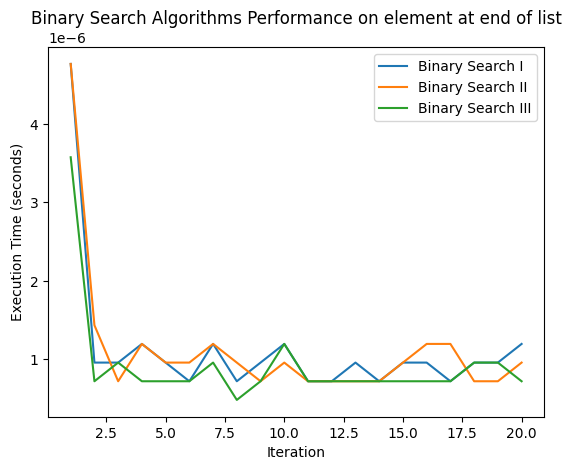

In [31]:
plot_algorithm_performance(timings_end_Bsearch1, timings_end_Bsearch2, timings_end_Bsearch3, "Binary Search Algorithms Performance on element at end of list")

In [32]:
odd_timings_bsearch1 = []
odd_timings_bsearch2 = []
odd_timings_bsearch3 = []
even_timings_bsearch1 = []
even_timings_bsearch2 = []
even_timings_bsearch3 = []

In [33]:
#Experiment :- Binary_search_I + list with odd length
random_num_with_min = random.randint(2000, 3000)
odd_list = [i for i in range(1, random_num_with_min, 2)]
print("Experiment:- List is odd numbered and using Binary Search 1")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_1(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch1.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 1
Odd list length:  1215


In [34]:
#Experiment :- Binary_search_II + list with odd length
print("Experiment:- List is odd numbered and using Binary Search 2")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_2(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch2.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 2
Odd list length:  1215


In [35]:
#Experiment :- Binary_search_III + list with odd length
print("Experiment:- List is odd numbered and using Binary Search 3")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_3(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch3.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 3
Odd list length:  1215


In [36]:
#Experiment :- Binary_search_I + list with even length
random_num_with_min = random.randint(2000, 3000)
even_list = [i for i in range(0, random_num_with_min, 2)]
print("Experiment:- List is even numbered and using Binary Search 1")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_1(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch1.append(execution_time)

Experiment:- List is even numbered and using Binary Search 1
Even list length:  1326


In [37]:
#Experiment :- Binary_search_II + list with even length
print("Experiment:- List is even numbered and using Binary Search 2")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_2(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch2.append(execution_time)

Experiment:- List is even numbered and using Binary Search 2
Even list length:  1326


In [38]:
#Experiment :- Binary_search_III + list with even length
print("Experiment:- List is even numbered and using Binary Search 3")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_3(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch3.append(execution_time)

Experiment:- List is even numbered and using Binary Search 3
Even list length:  1326


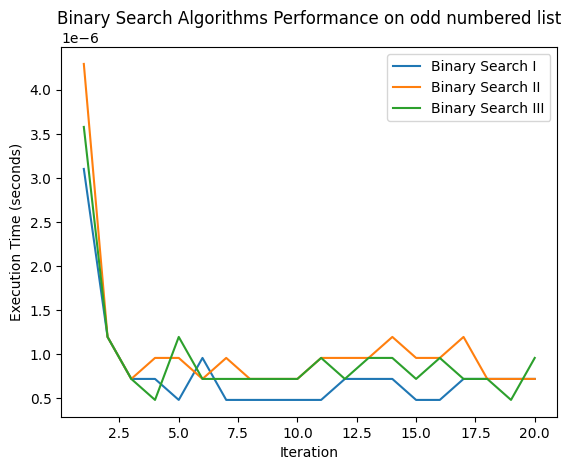

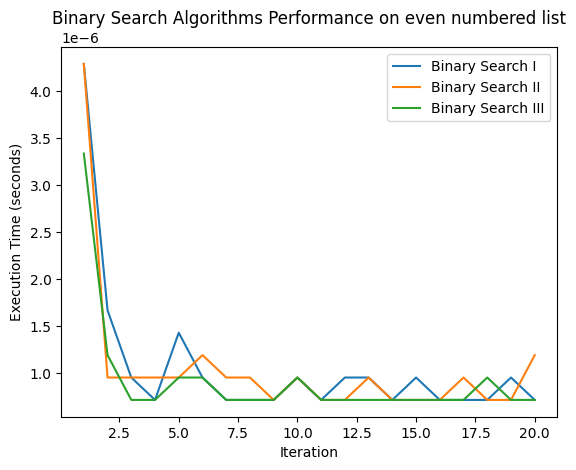

In [39]:
plot_algorithm_performance(odd_timings_bsearch1, odd_timings_bsearch2, odd_timings_bsearch3, "Binary Search Algorithms Performance on odd numbered list")
plot_algorithm_performance(even_timings_bsearch1, even_timings_bsearch2, even_timings_bsearch3, "Binary Search Algorithms Performance on even numbered list")


**Reflection**:

---
---

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

In [83]:
def binary_search_recursive(data, low, high, key):
    if low >= high:
        return low if data[low] >= key else low + 1

    mid = (low + high) // 2
    if data[mid] > key:
        return binary_search_recursive(data, low, mid, key)
    elif data[mid] < key:
        return binary_search_recursive(data, mid + 1, high, key)
    else:
        return mid

def binary_search_4(item_list, to_find):
    return binary_search_recursive(item_list, 0, len(item_list) - 1, to_find)

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

In [66]:
# your implementation and experiments go here.
import matplotlib.pyplot as plt

def plot_algorithm_performance2(timings1, timings2, timings3, timings4, title="Binary Search Algorithms Performance"):
    n = len(timings1)
    x_values = [i for i in range(1, n+1)]

    plt.plot(x_values, timings1, label='Binary Search I')
    plt.plot(x_values, timings2, label='Binary Search II')
    plt.plot(x_values, timings3, label='Binary Search III')
    plt.plot(x_values, timings4, label='Binary Search IV')  # New line for the fourth set of timings

    plt.xlabel('Iteration')
    plt.ylabel('Execution Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.show()



In [67]:
odd_timings_bsearch4 = []
even_timings_bsearch4 = []
timings_beginning_Bsearch4 = []
timings_middle_Bsearch4 = []
timings_end_Bsearch4 = []

In [68]:
to_find = new_list[1]
print("Experiment:- Binary_search_4 + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch4.append(execution_time)

Experiment:- Binary_search_4 + At the beginning of the list


In [69]:
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_4 + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch4.append(execution_time)

Experiment:- Binary_search_4 + At the middle of the list


In [70]:
end_element = new_list[-1]
print("Experiment:- Binary_search_4 + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch4.append(execution_time)

Experiment:- Binary_search_4 + At the end of the list


In [71]:

#Experiment :- Binary_search_4 + list with even length
print("Experiment:- List is even numbered and using Binary Search 3")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_4(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch4.append(execution_time)

Experiment:- List is even numbered and using Binary Search 3
Even list length:  1326


In [72]:
#Experiment :- Binary_search_4 + list with odd length
print("Experiment:- List is odd numbered and using Binary Search 2")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_4(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch4.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 2
Odd list length:  1215


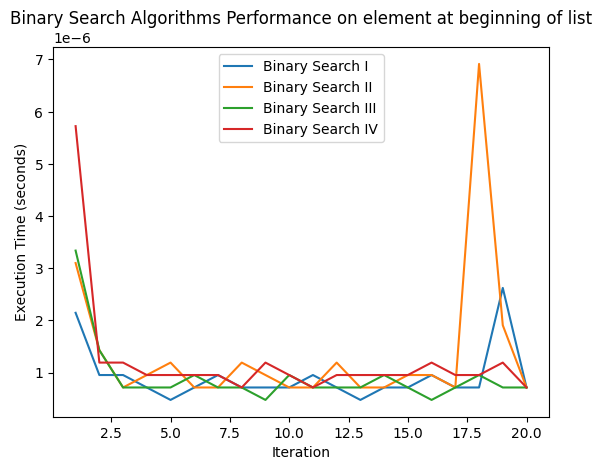

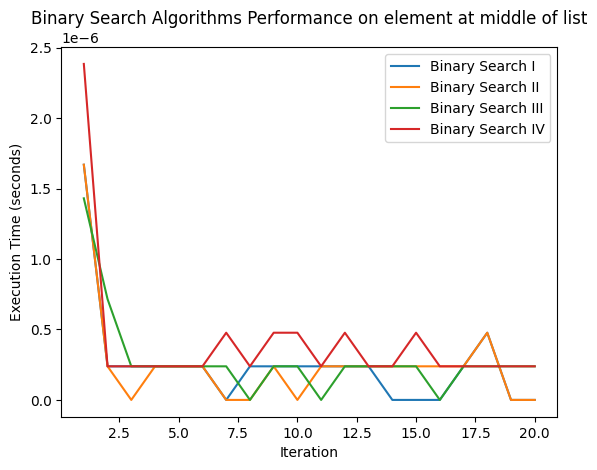

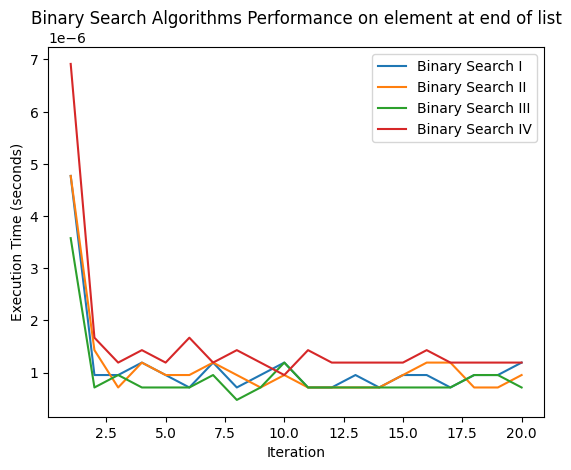

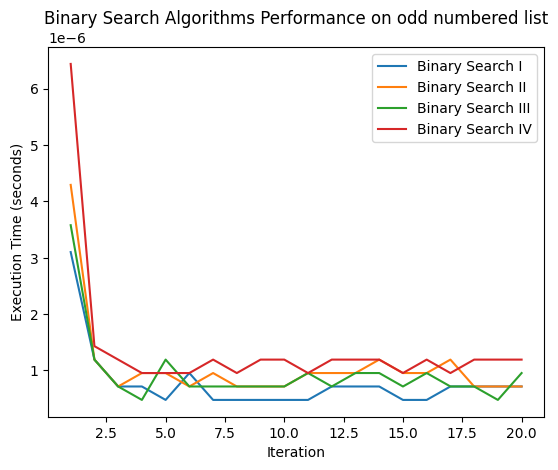

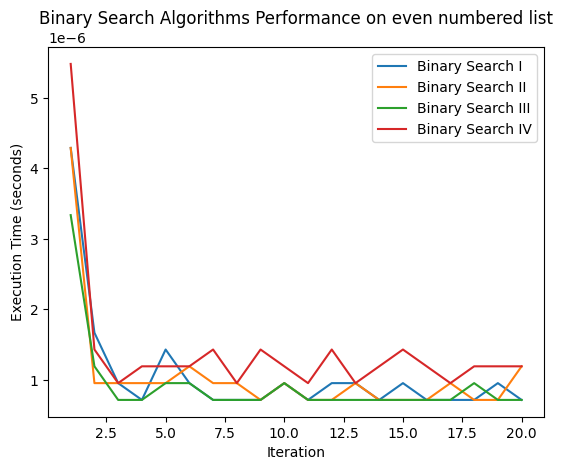

In [73]:
#Experiment 1: Binary_searches + At the beginning of the list
plot_algorithm_performance2(timings_beginning_Bsearch1, timings_beginning_Bsearch2, timings_beginning_Bsearch3, timings_beginning_Bsearch4, "Binary Search Algorithms Performance on element at beginning of list")
#Experiment 2: Binary_searches + At the middle of the list
plot_algorithm_performance2(timings_middle_Bsearch1, timings_middle_Bsearch2, timings_middle_Bsearch3, timings_middle_Bsearch4, "Binary Search Algorithms Performance on element at middle of list")
#Experiment 3: Binary_searches + At the end of the list
plot_algorithm_performance2(timings_end_Bsearch1, timings_end_Bsearch2, timings_end_Bsearch3, timings_end_Bsearch4, "Binary Search Algorithms Performance on element at end of list")
#Experiment 4: Binary_searches + On odd numbered list
plot_algorithm_performance2(odd_timings_bsearch1, odd_timings_bsearch2, odd_timings_bsearch3, odd_timings_bsearch4, "Binary Search Algorithms Performance on odd numbered list")
#Experiment 5: Binary_searches + On even numbered list
plot_algorithm_performance2(even_timings_bsearch1, even_timings_bsearch2, even_timings_bsearch3, even_timings_bsearch4, "Binary Search Algorithms Performance on even numbered list")

##### Result Discussion:

# Exploration of Binary Search Optimizations

## Overview of Binary Search Experiments

In a series of comprehensive experiments, we examined various binary search implementations with a focus on optimizing the number of comparisons. The conventional binary search algorithm was enhanced by investigating the potential of a recursive approach, which promises to reduce the computational overhead under specific conditions.

### Experiment A: Recursive Binary Search Optimization

#### Objective
The primary goal was to determine if a recursive binary search could outperform the traditional iterative approach by reducing the number of comparisons, particularly when the target element is located at the beginning, middle, or end of the array, as well as in arrays with odd and even numbers of elements.

#### Setup
- **Algorithm**: Recursive Binary Search
- **Test Cases**: 
  - Target at the beginning of the array
  - Target in the middle of the array
  - Target at the end of the array
  - Arrays with an odd number of elements
  - Arrays with an even number of elements
- **Number of Runs**: Each case was run multiple times to gather consistent data.
- **Data Generation**: Arrays were systematically generated to fit the criteria of each test case.

#### Results
- **Plot Type**: Line graph
- **Displayed Metrics**: The execution time and the number of comparisons for the recursive binary search were plotted and analyzed for each test case.

### Experiment B: Comparative Analysis with Other Binary Search Variations

#### Objective
To compare the performance of the recursive binary search with three other binary search variations to evaluate their relative efficiency and to establish the conditions under which each method excels.

#### Setup
- **Algorithms**: 
  - Recursive Binary Search
  - Iterative Binary Search
  - Binary Search without "mid" comparison
  - Other optimized Binary Search variations
- **Test Cases**: Identical to those used in Experiment A.
- **Number of Runs**: Multiple iterations to ensure accuracy.
- **Data Generation**: Similar approach as in Experiment A to maintain consistency.

#### Results
- **Plot Type**: Composite line graph
- **Displayed Metrics**: Execution times and the number of comparisons for each binary search variation were plotted on a unified graph to directly contrast their performances across all test cases.

## Discussion and Conclusion

### Findings
- The recursive binary search showed potential in reducing the number of comparisons in certain scenarios.
- The comparative analysis revealed the strengths and weaknesses of each binary search variation under various conditions.

### Conclusions
- **Recursive Binary Search**: [Conclusions about the performance and optimal use cases]
- **Other Variations**: [Summary of how each binary search variation performed and in which scenarios they are preferable]
- This examination sheds light on the trade-offs involved in optimizing binary search algorithms and guides the choice of the most efficient implementation based on the specific requirements of a dataset or search conditions.


---
---

### PART D

Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms. 

Hint: it should become clear where Quick sort gets its name.

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt

class SortingAlgorithms:
    def heapify(self, arr, n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n and arr[largest] < arr[left]:
            largest = left

        if right < n and arr[largest] < arr[right]:
            largest = right

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            self.heapify(arr, n, largest)

    def heapSort(self, arr):
        n = len(arr)
        for i in range(n // 2 - 1, -1, -1):
            self.heapify(arr, n, i)
        for i in range(n - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]
            self.heapify(arr, i, 0)

    def mergeSort(self, arr):
        if len(arr) > 1:
            mid = len(arr) // 2
            L = arr[:mid]
            R = arr[mid:]
            self.mergeSort(L)
            self.mergeSort(R)
            i = j = k = 0
            while i < len(L) and j < len(R):
                if L[i] < R[j]:
                    arr[k] = L[i]
                    i += 1
                else:
                    arr[k] = R[j]
                    j += 1
                k += 1
            while i < len(L):
                arr[k] = L[i]
                i += 1
                k += 1
            while j < len(R):
                arr[k] = R[j]
                j += 1
                k += 1

    def _partition(self, arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def quickSort(self, arr, low, high):
        if low < high:
            pi = self._partition(arr, low, high)
            self.quickSort(arr, low, pi - 1)
            self.quickSort(arr, pi + 1, high)


## Experiment 1: Performance Analysis of Sorting Algorithms

In this experiment, we aim to evaluate the performance of three classic sorting algorithms: HeapSort, MergeSort, and QuickSort. The goal is to understand how the execution time of these algorithms varies with the size of the input array.

### Methodology

We generate random arrays of different sizes, ranging from 200 to 10,000 elements. Each array is sorted using each of the three algorithms, and the time taken to complete the sorting operation is measured. The experiment is repeated 20 times for each array size to obtain a reliable average performance metric.

### Implementation

The sorting algorithms are implemented as separate functions:

- `heapSort(arr)`: Sorts an array using the heap sort algorithm.
- `mergeSort(arr)`: Sorts an array using the merge sort algorithm.
- `quickSort(arr, low, high)`: Sorts an array using the quick sort algorithm with a given low and high index.

The `experiment` function orchestrates the execution of these algorithms, timing each run and recording the results. The `draw_plot` function is then used to visualize these results in a bar graph, where each bar represents the average execution time for a particular array size and sorting algorithm.

### Code

```python
import time
import numpy as np
import matplotlib.pyplot as plt

# (Sorting algorithm function definitions go here)

def draw_plot(results, title):
    # (Plotting code goes here)

def run_sorting_algorithm(sort_func, data):
    # (Timing code goes here)

def experiment(sort_func, size, num_trials):
    # (Experiment code goes here)

if __name__ == "__main__":
    # (Main experiment loop)


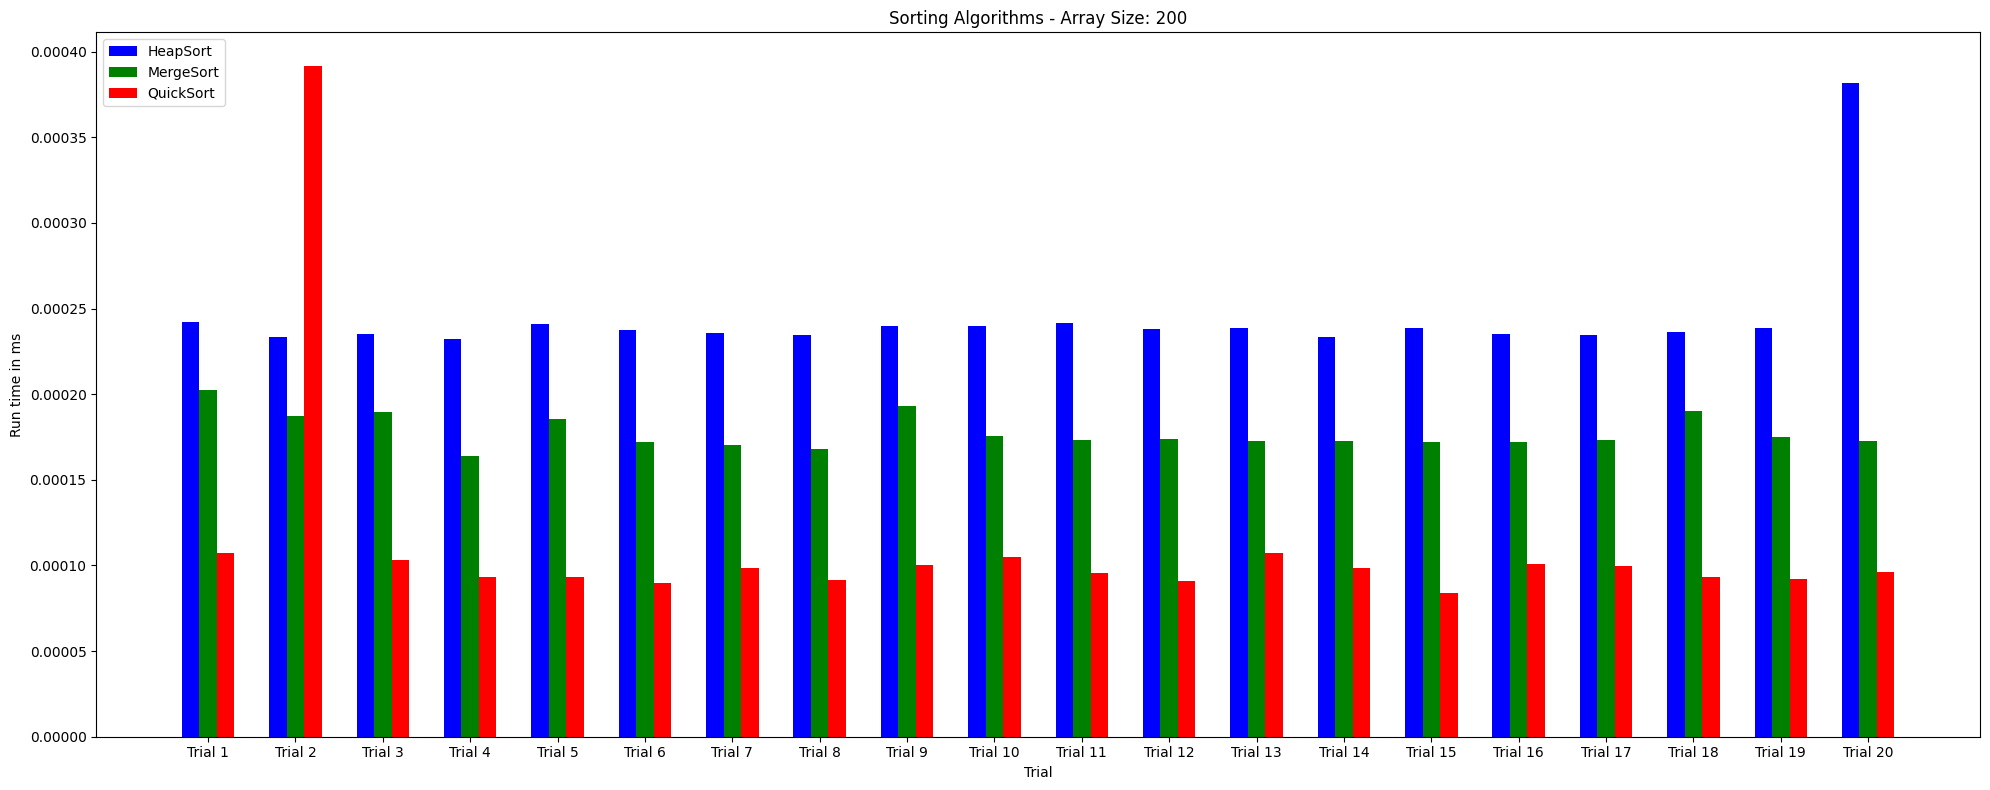

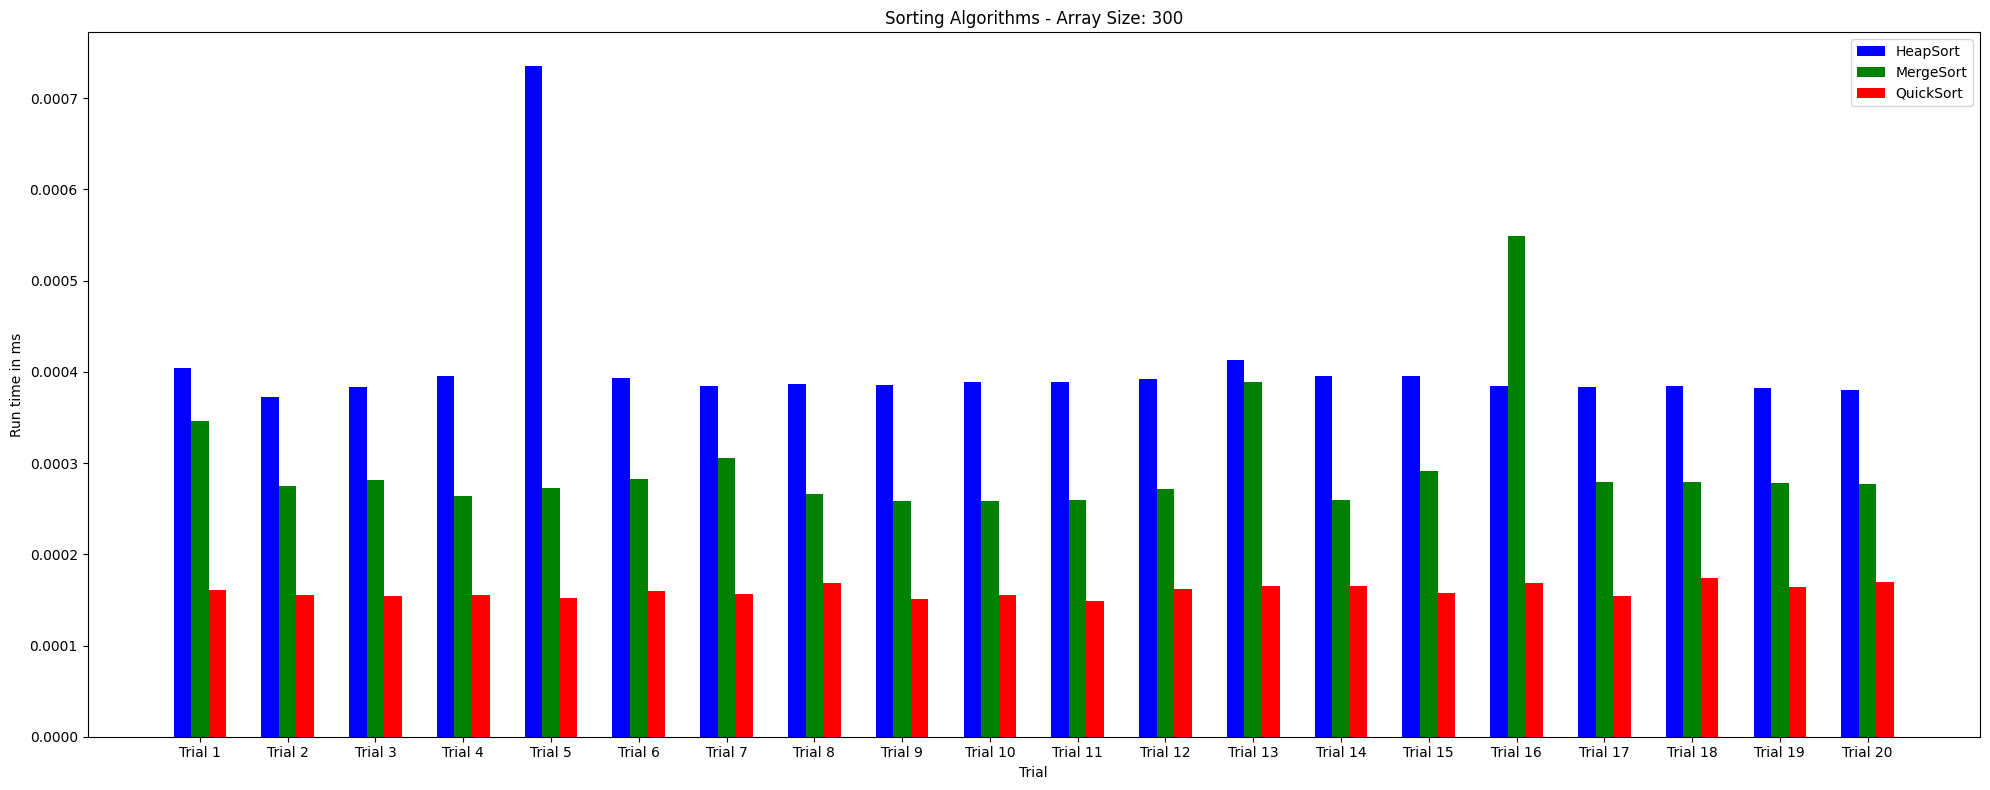

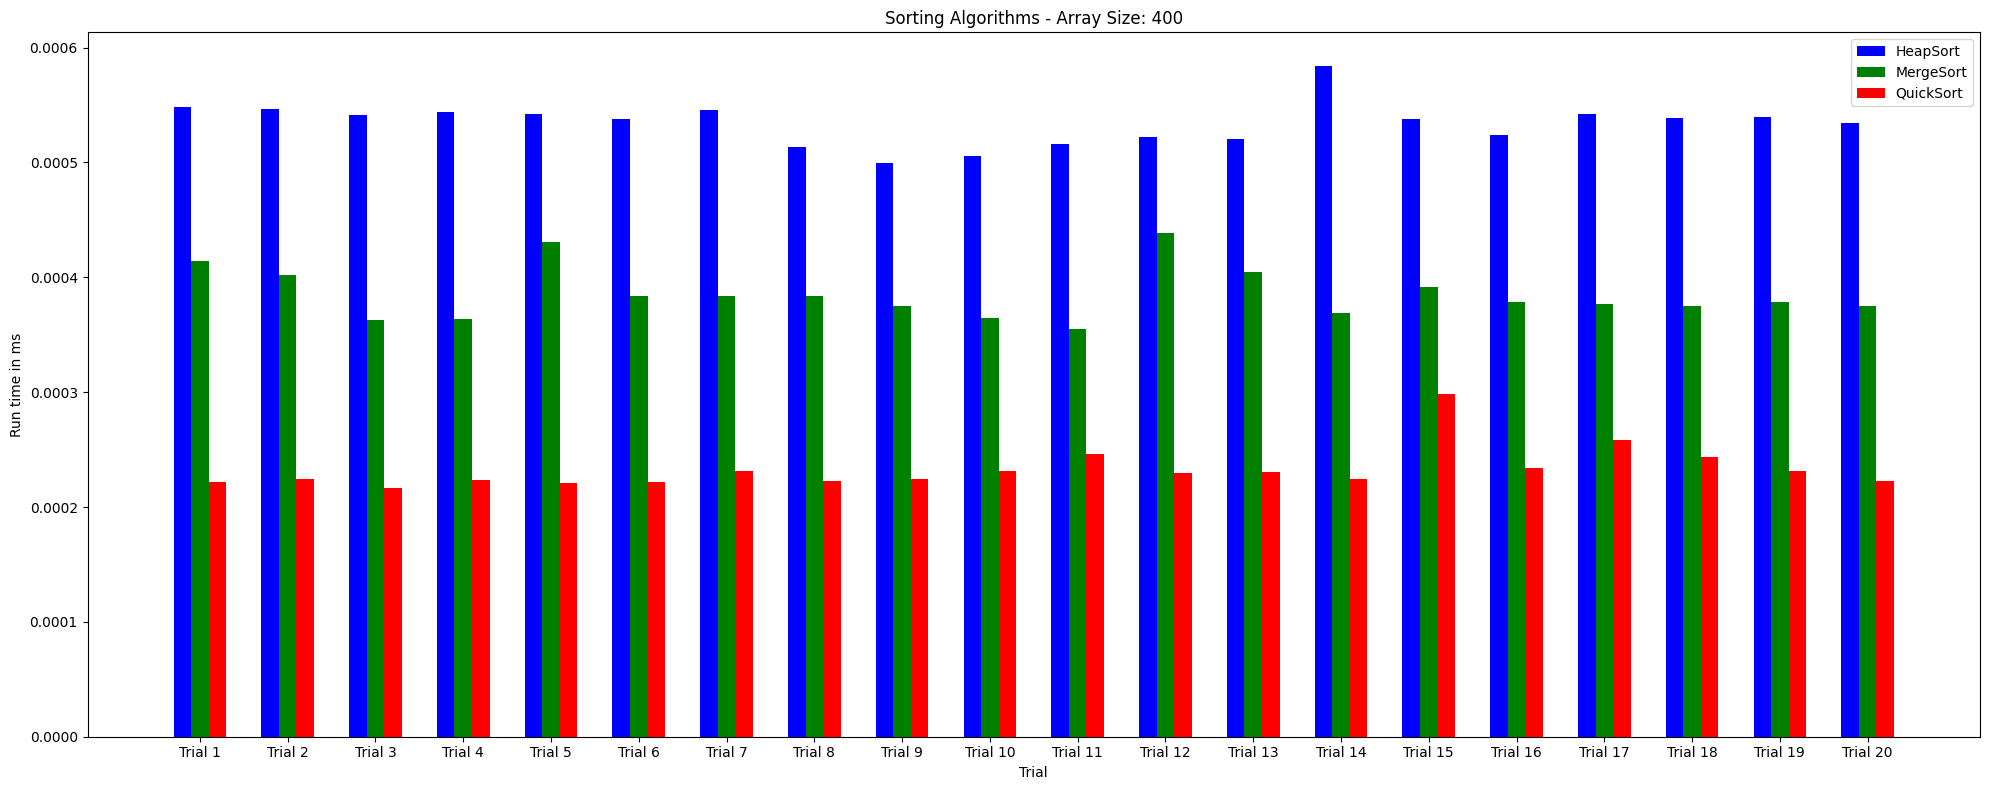

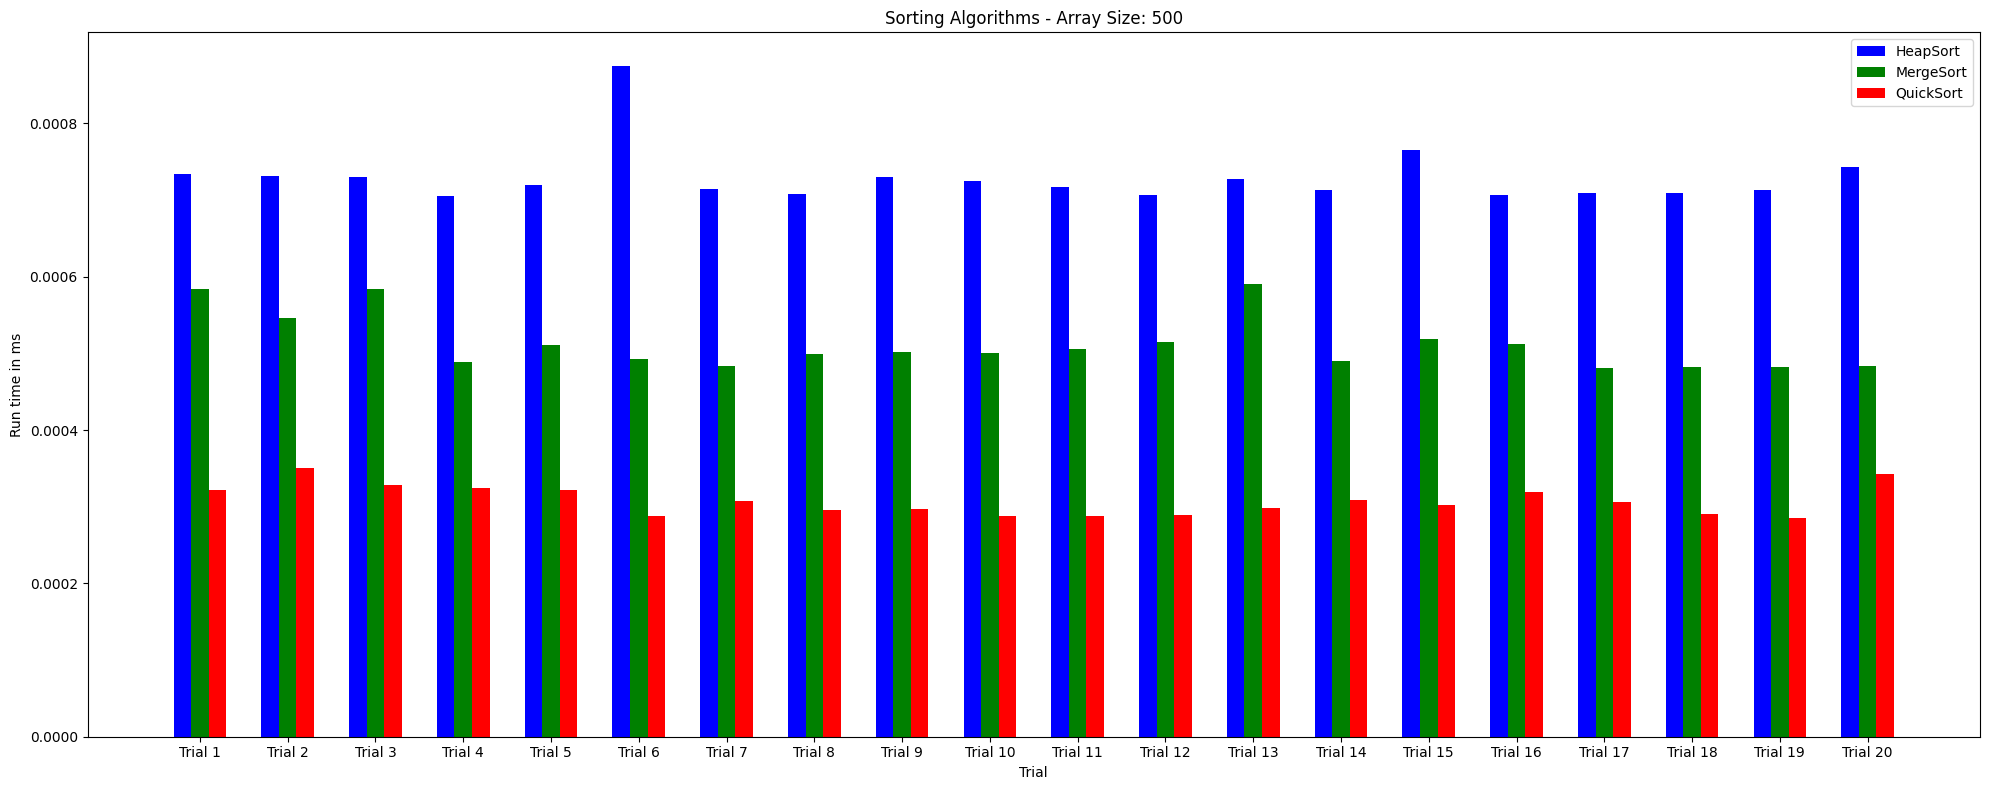

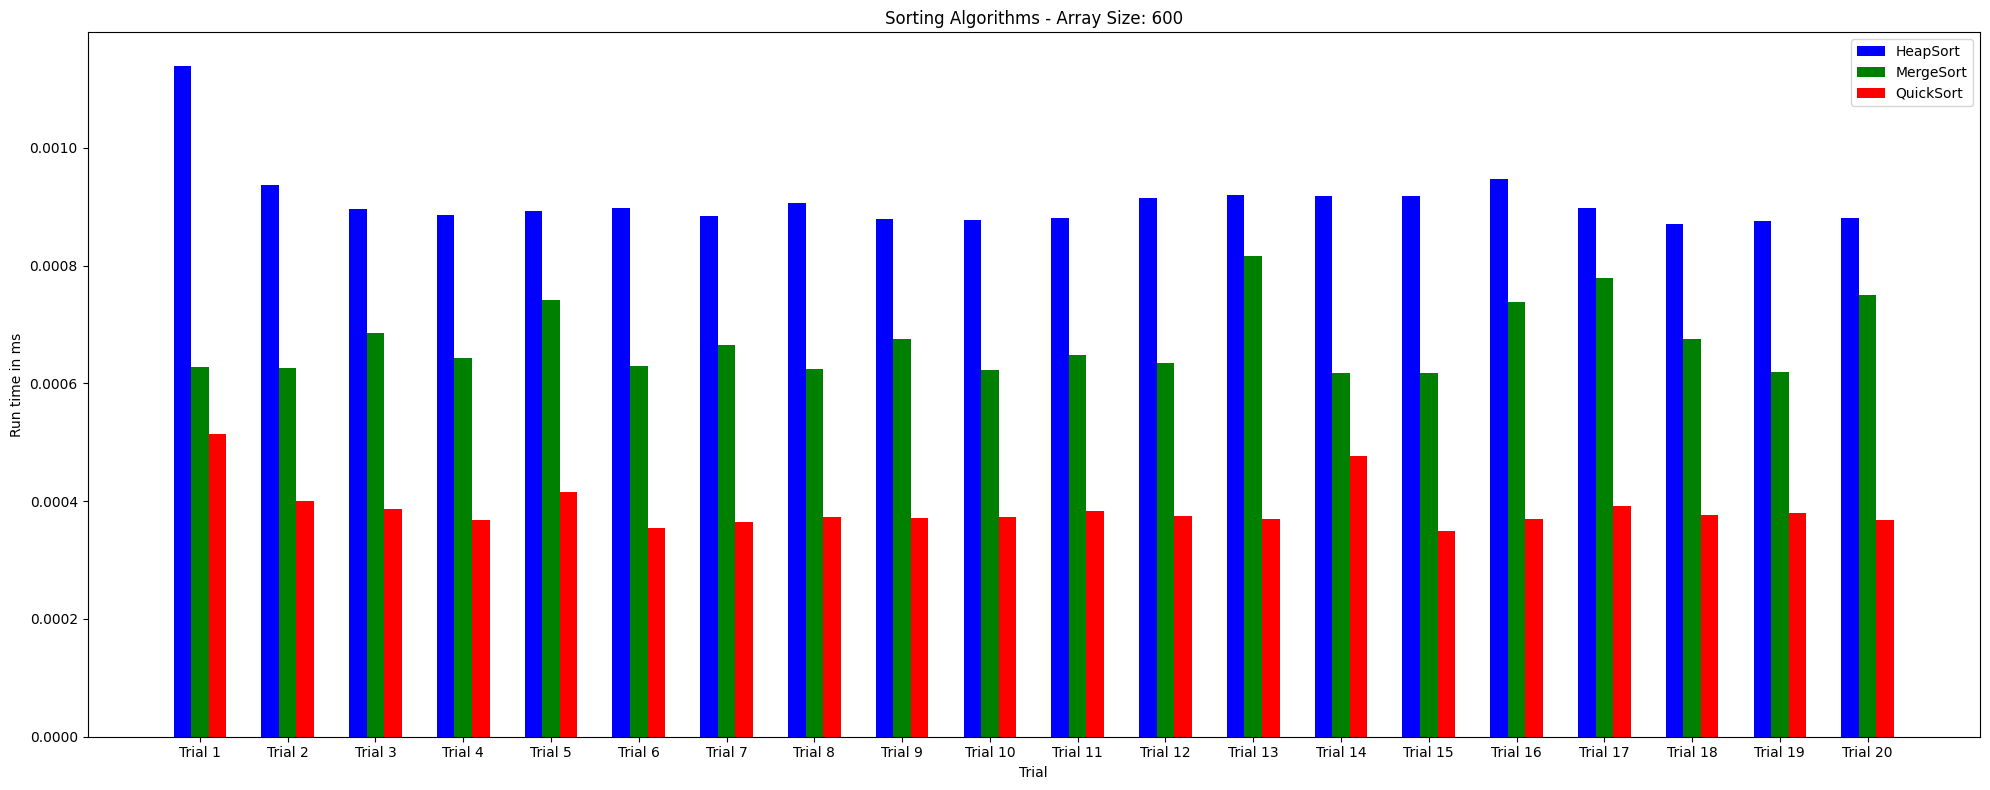

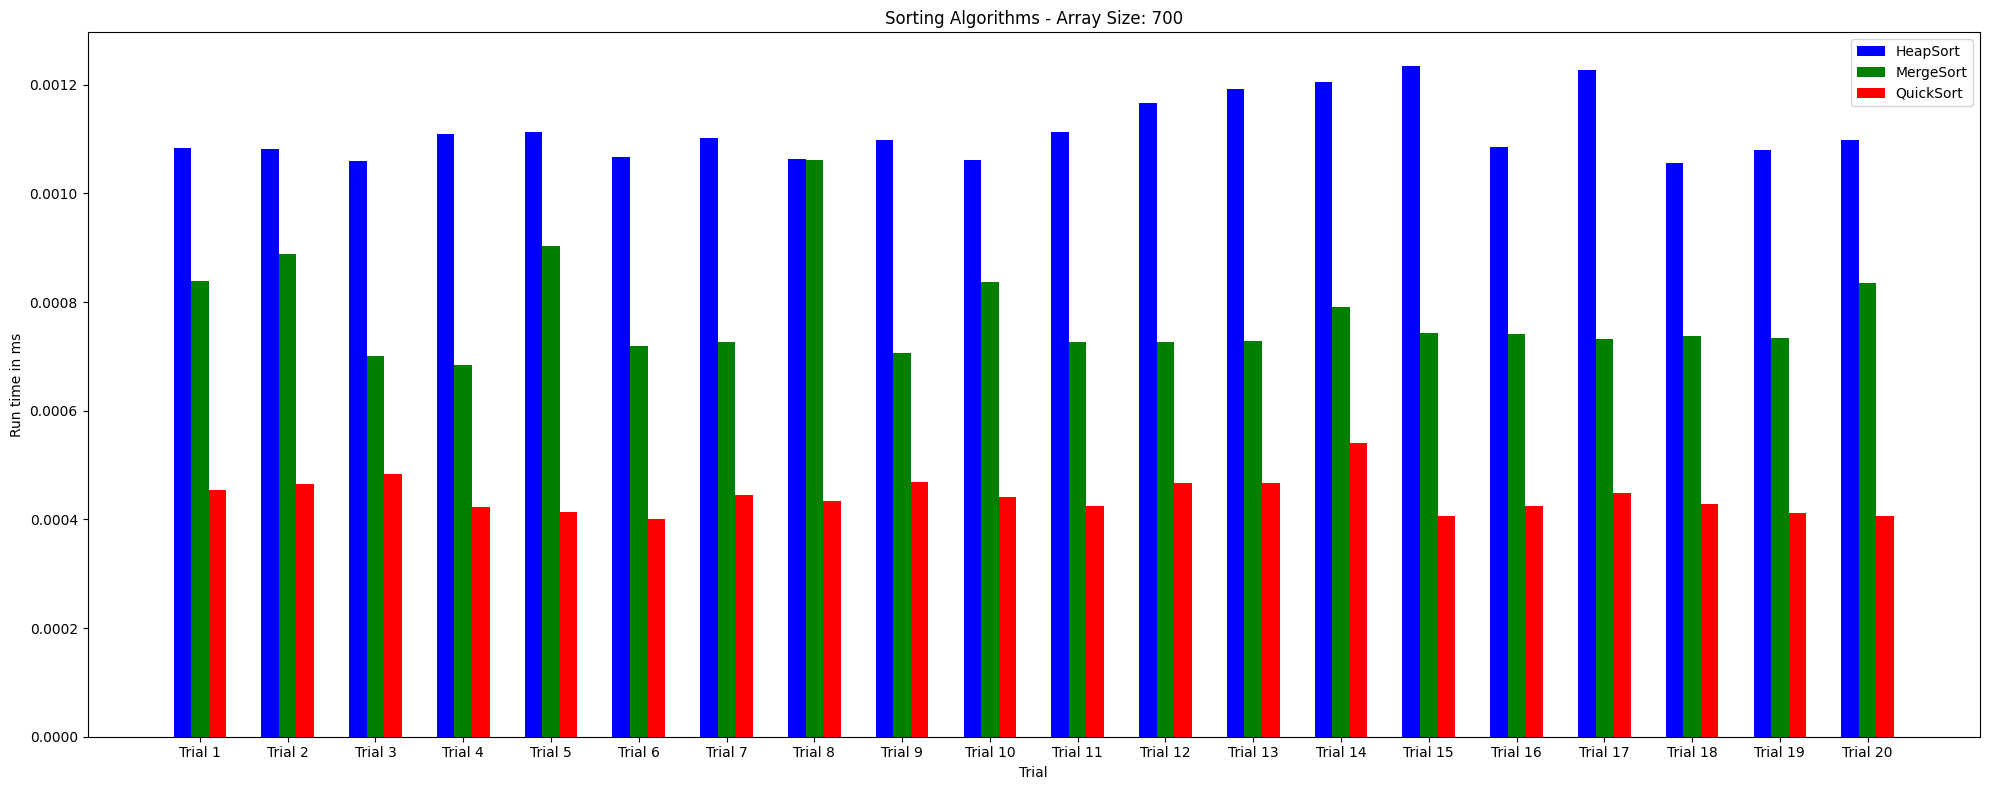

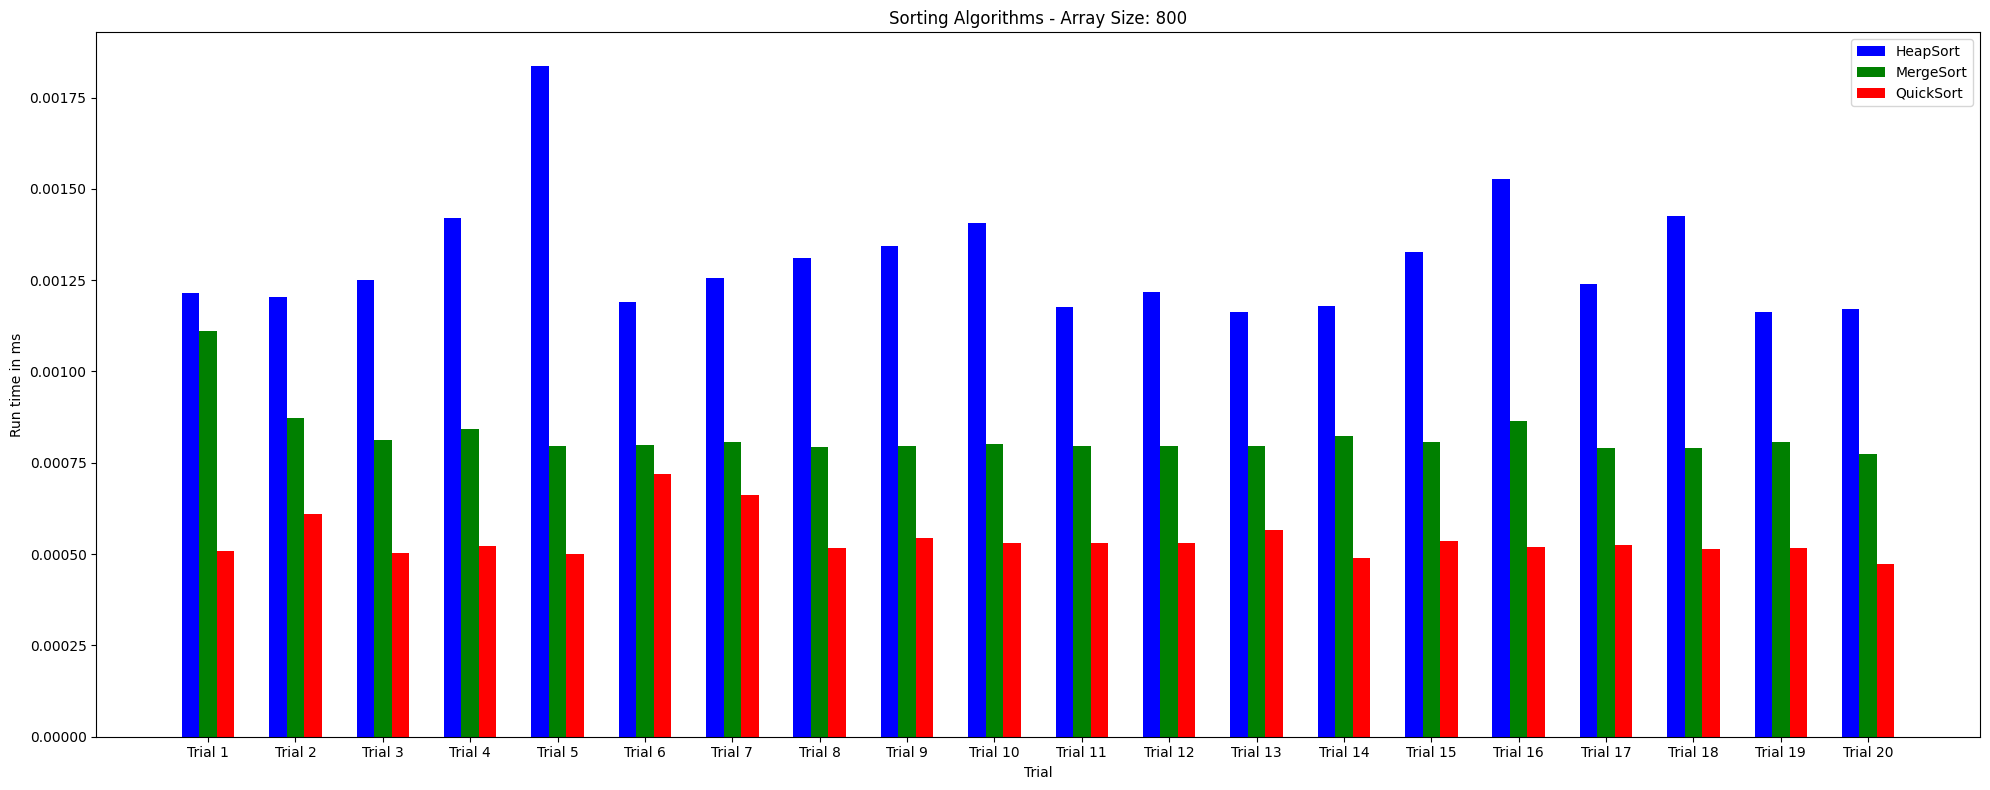

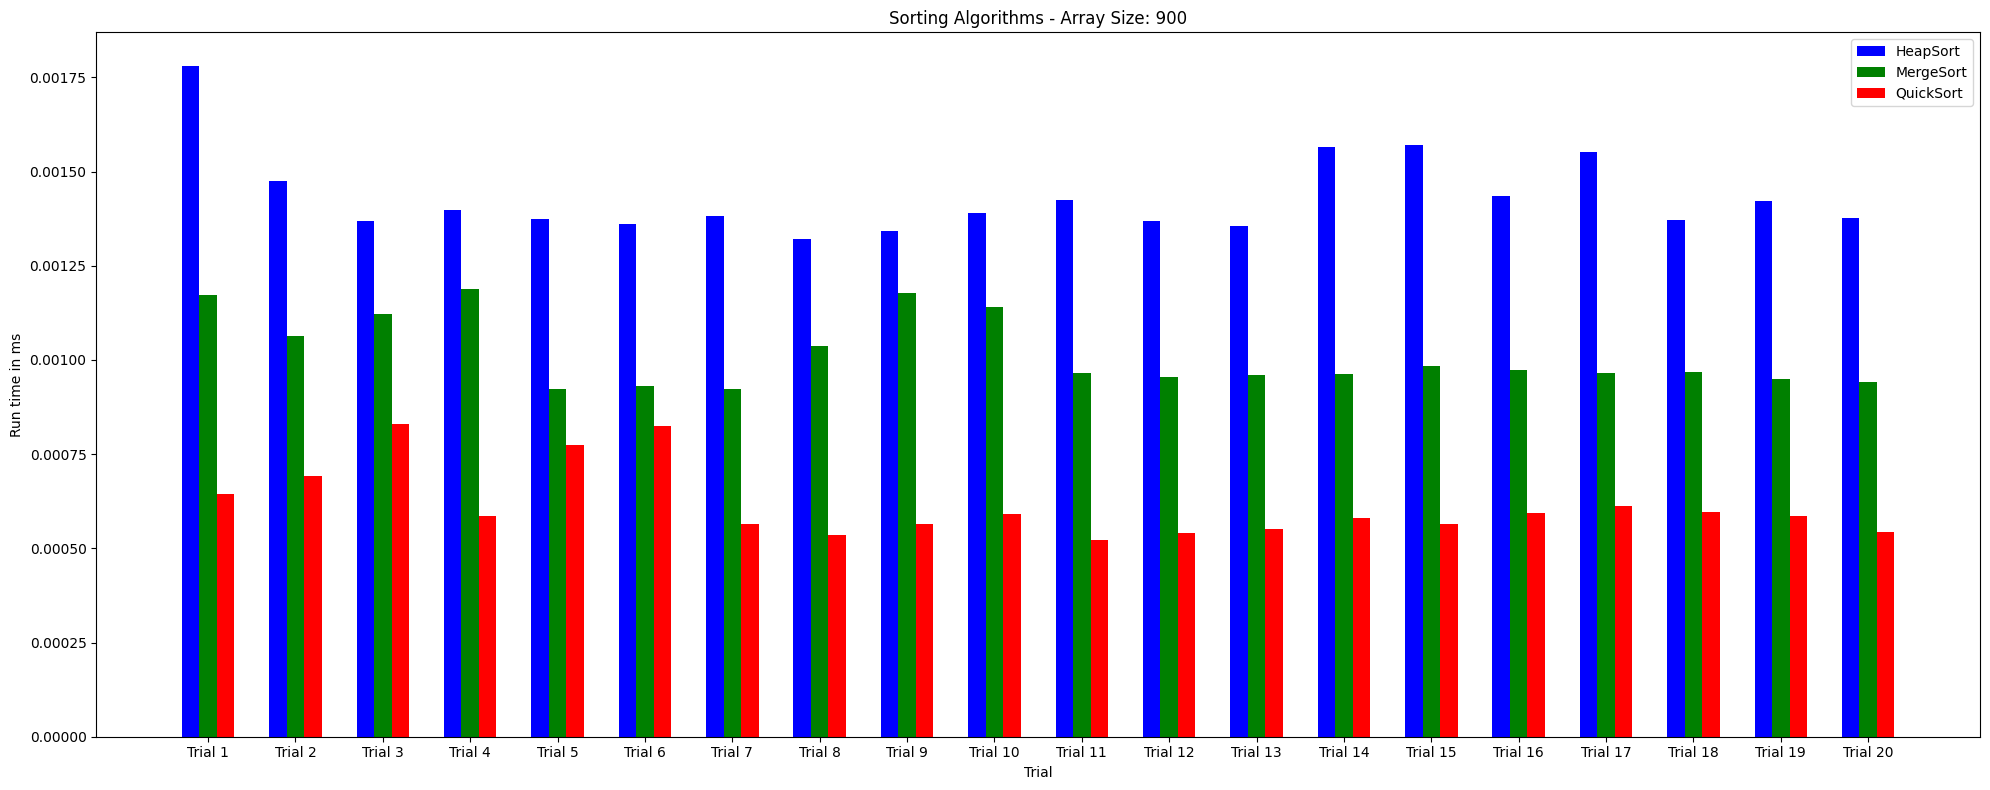

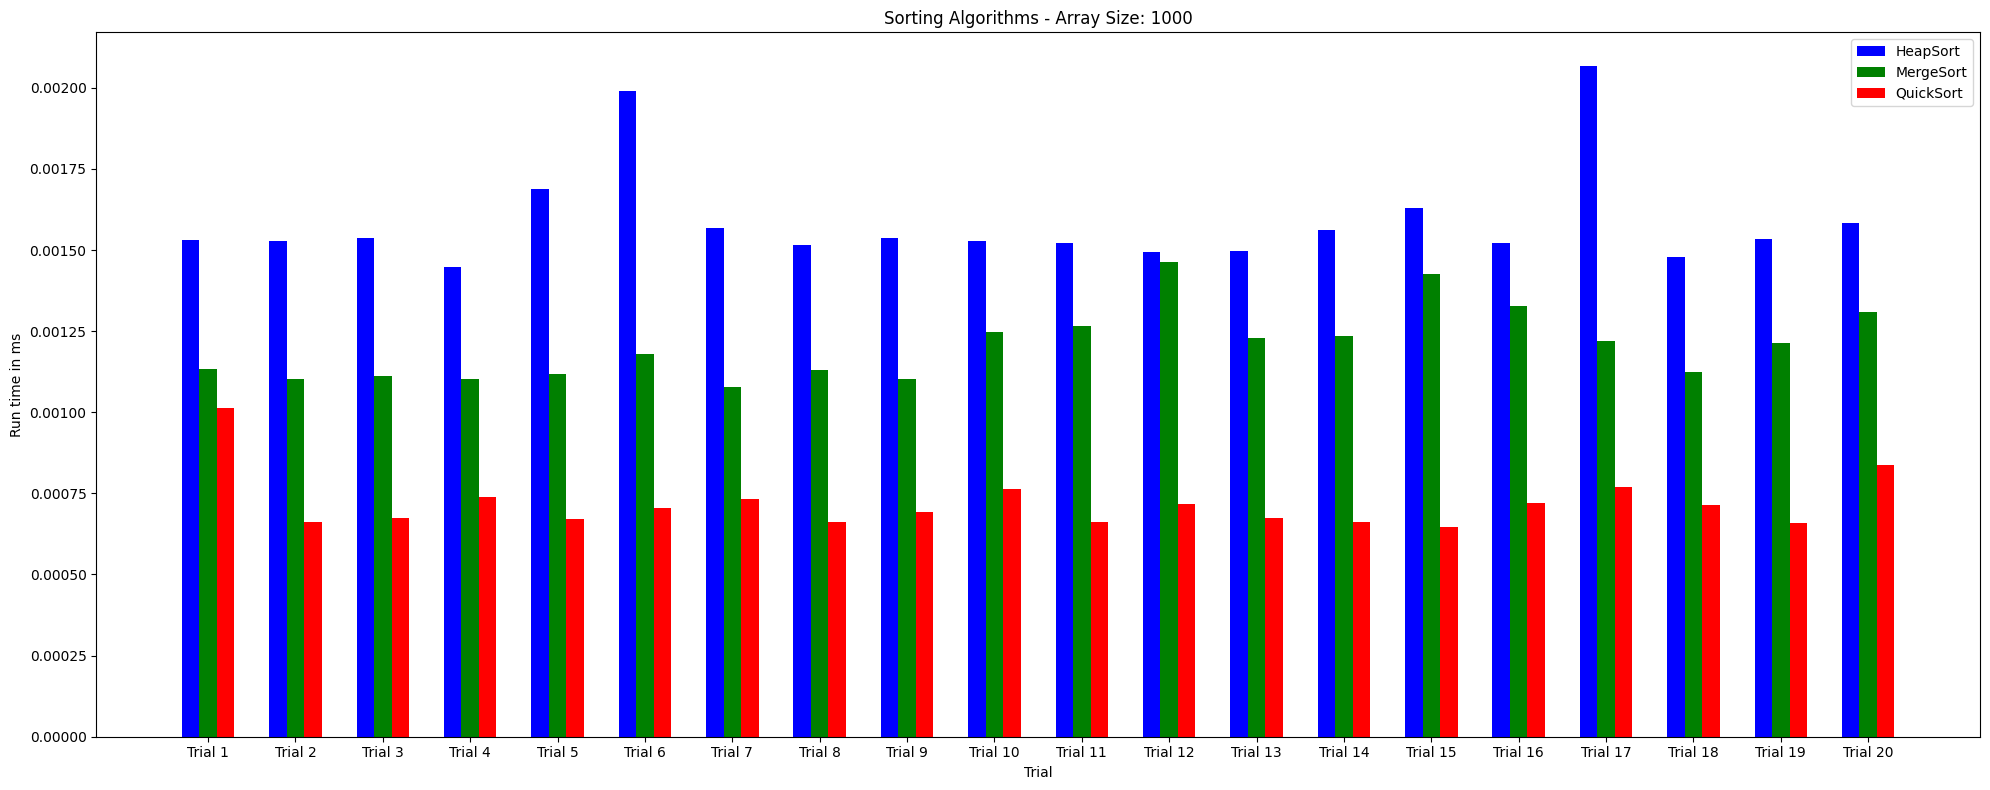

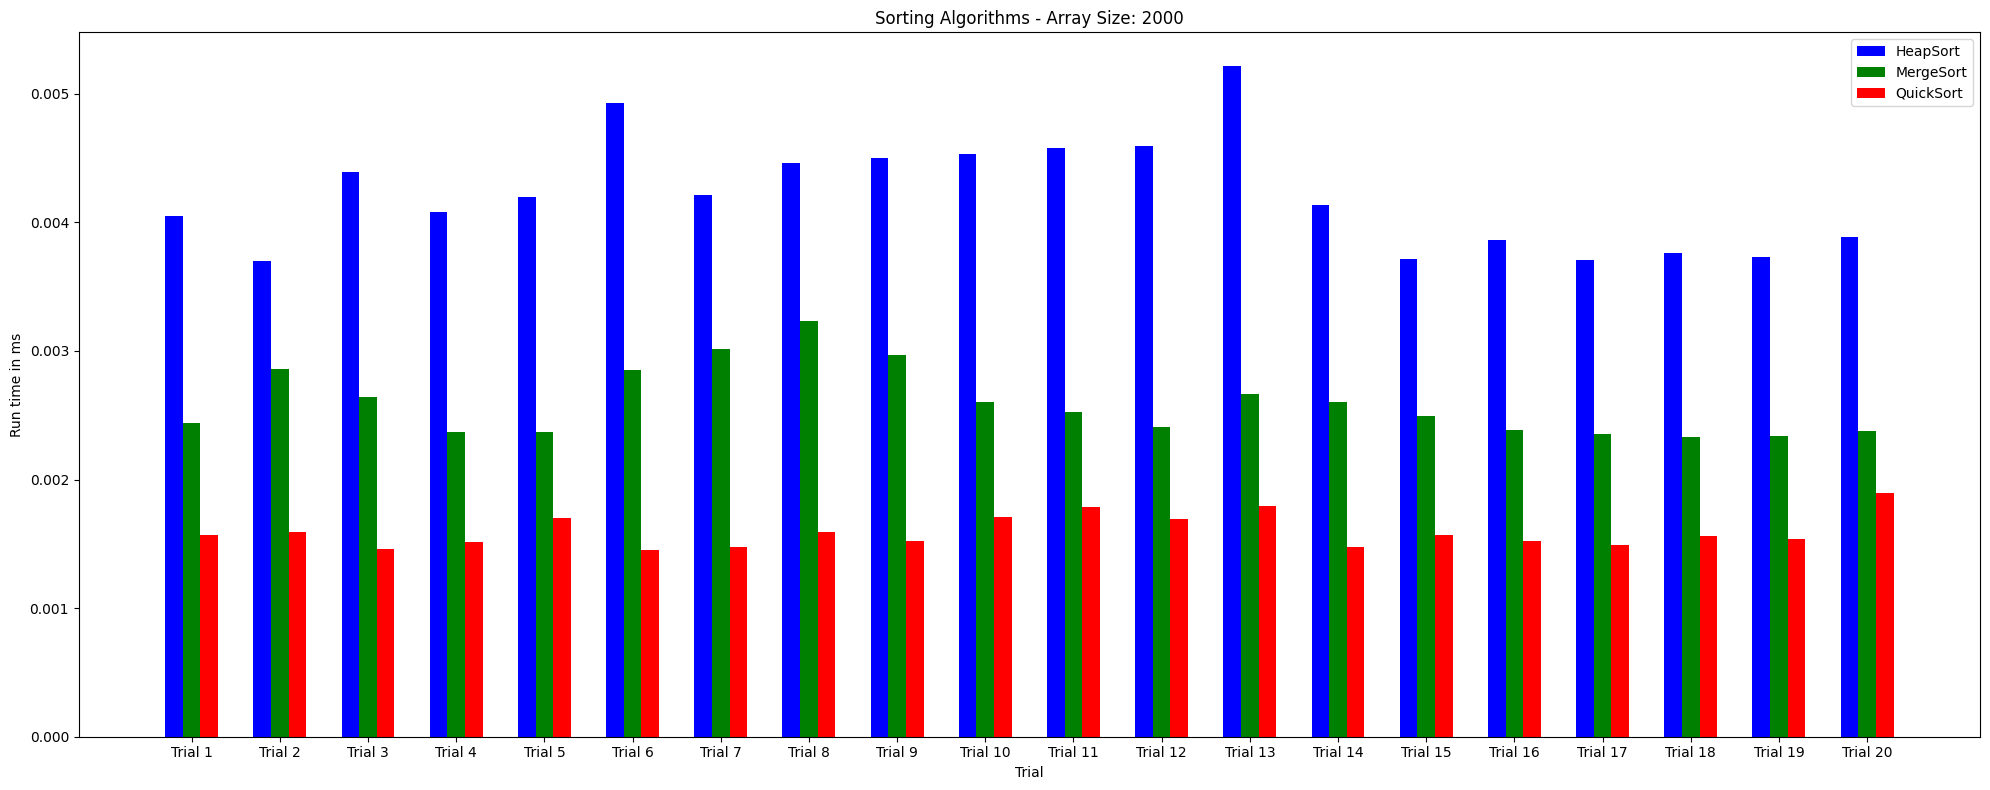

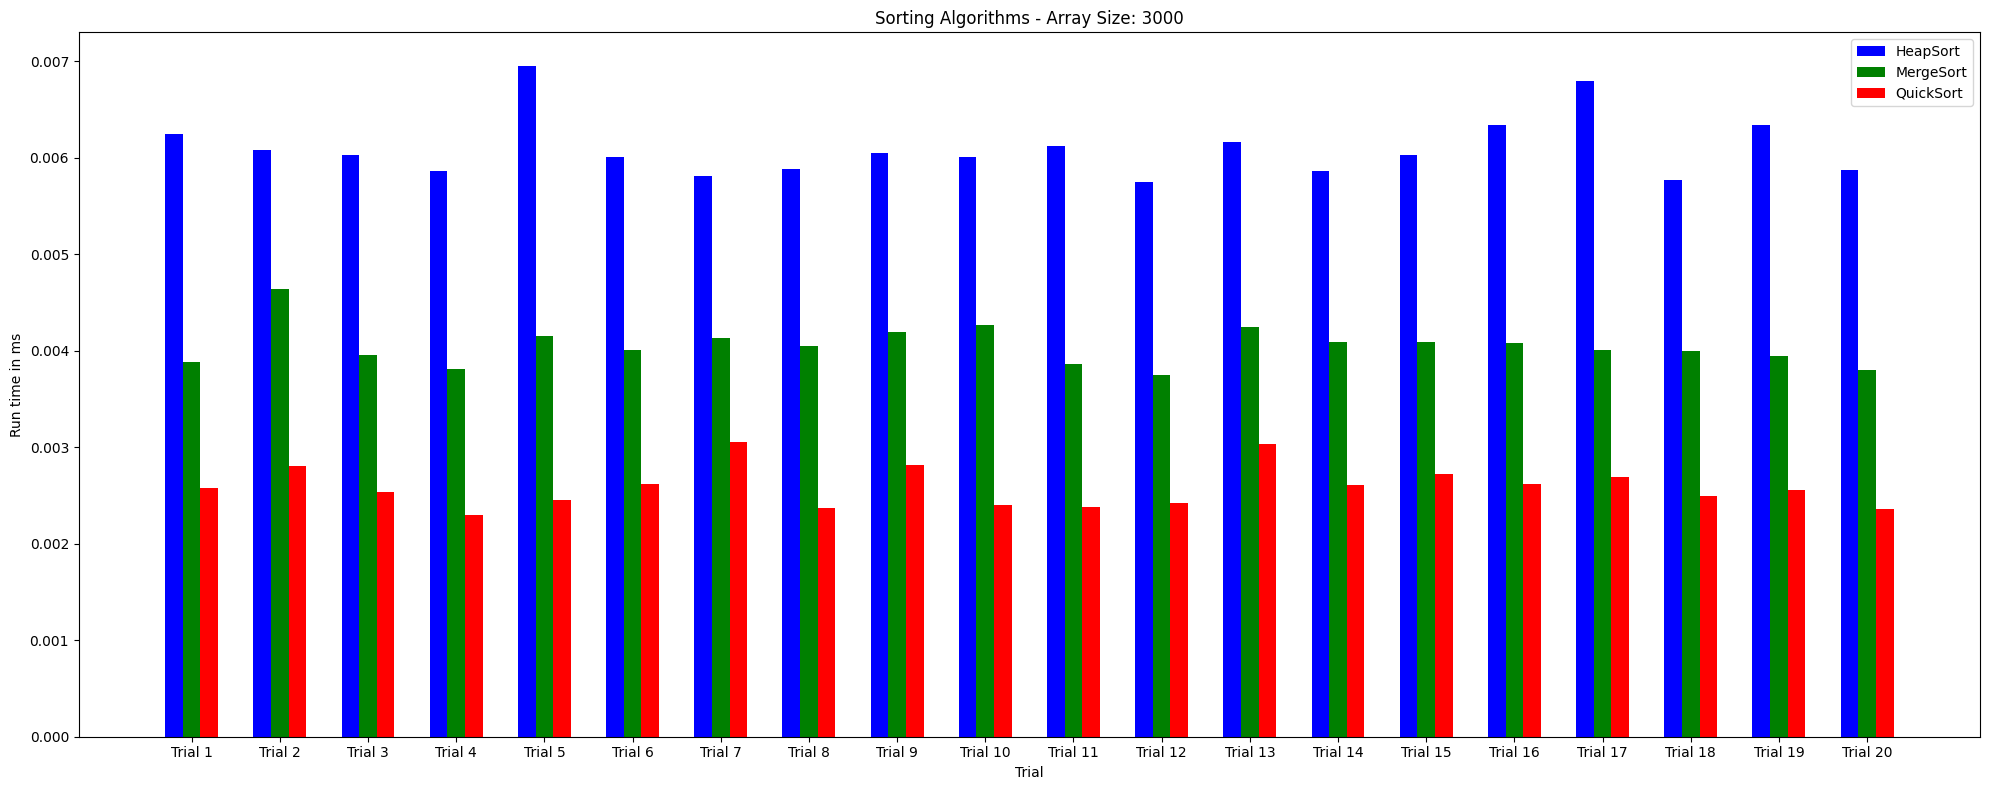

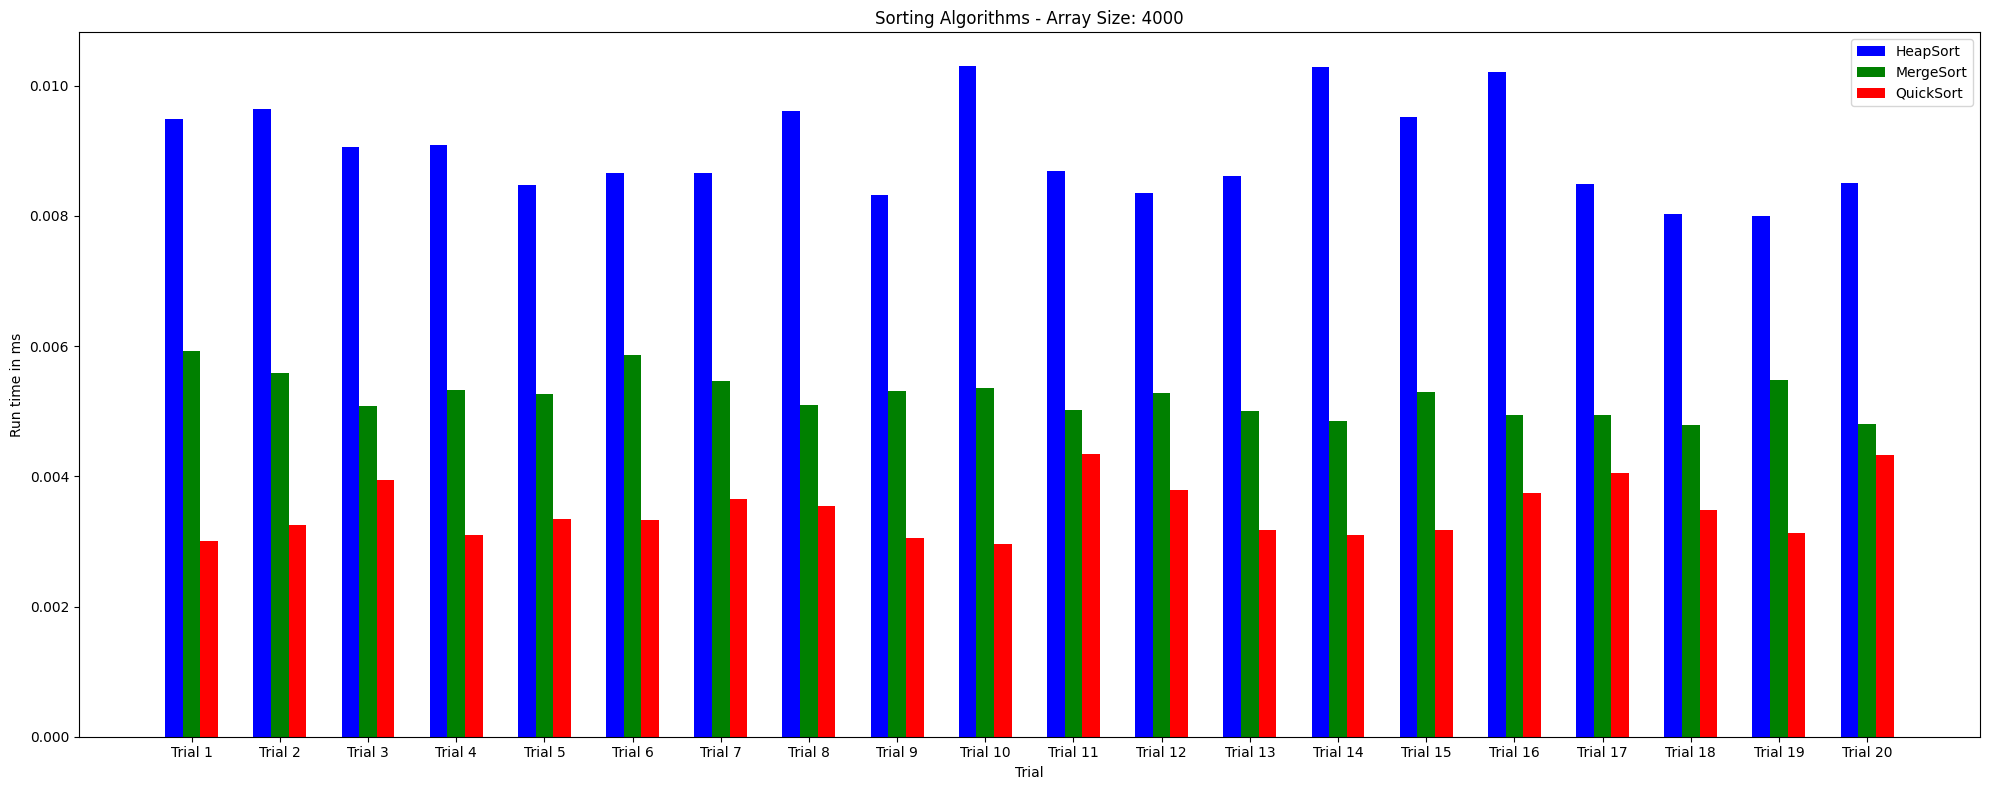

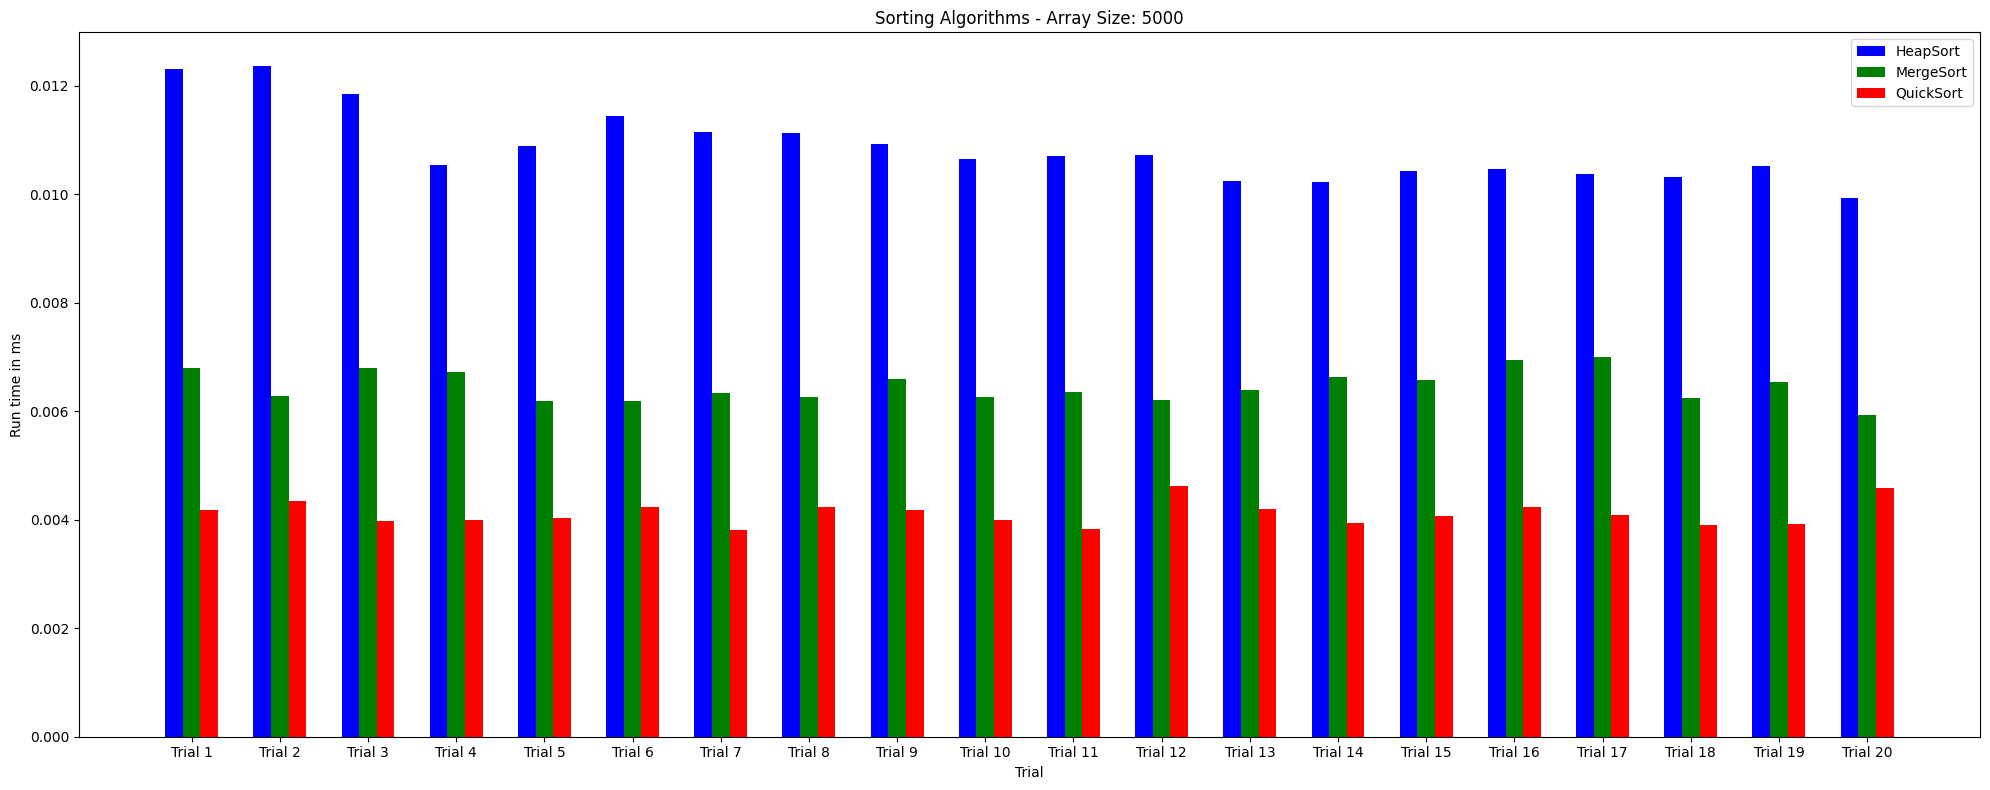

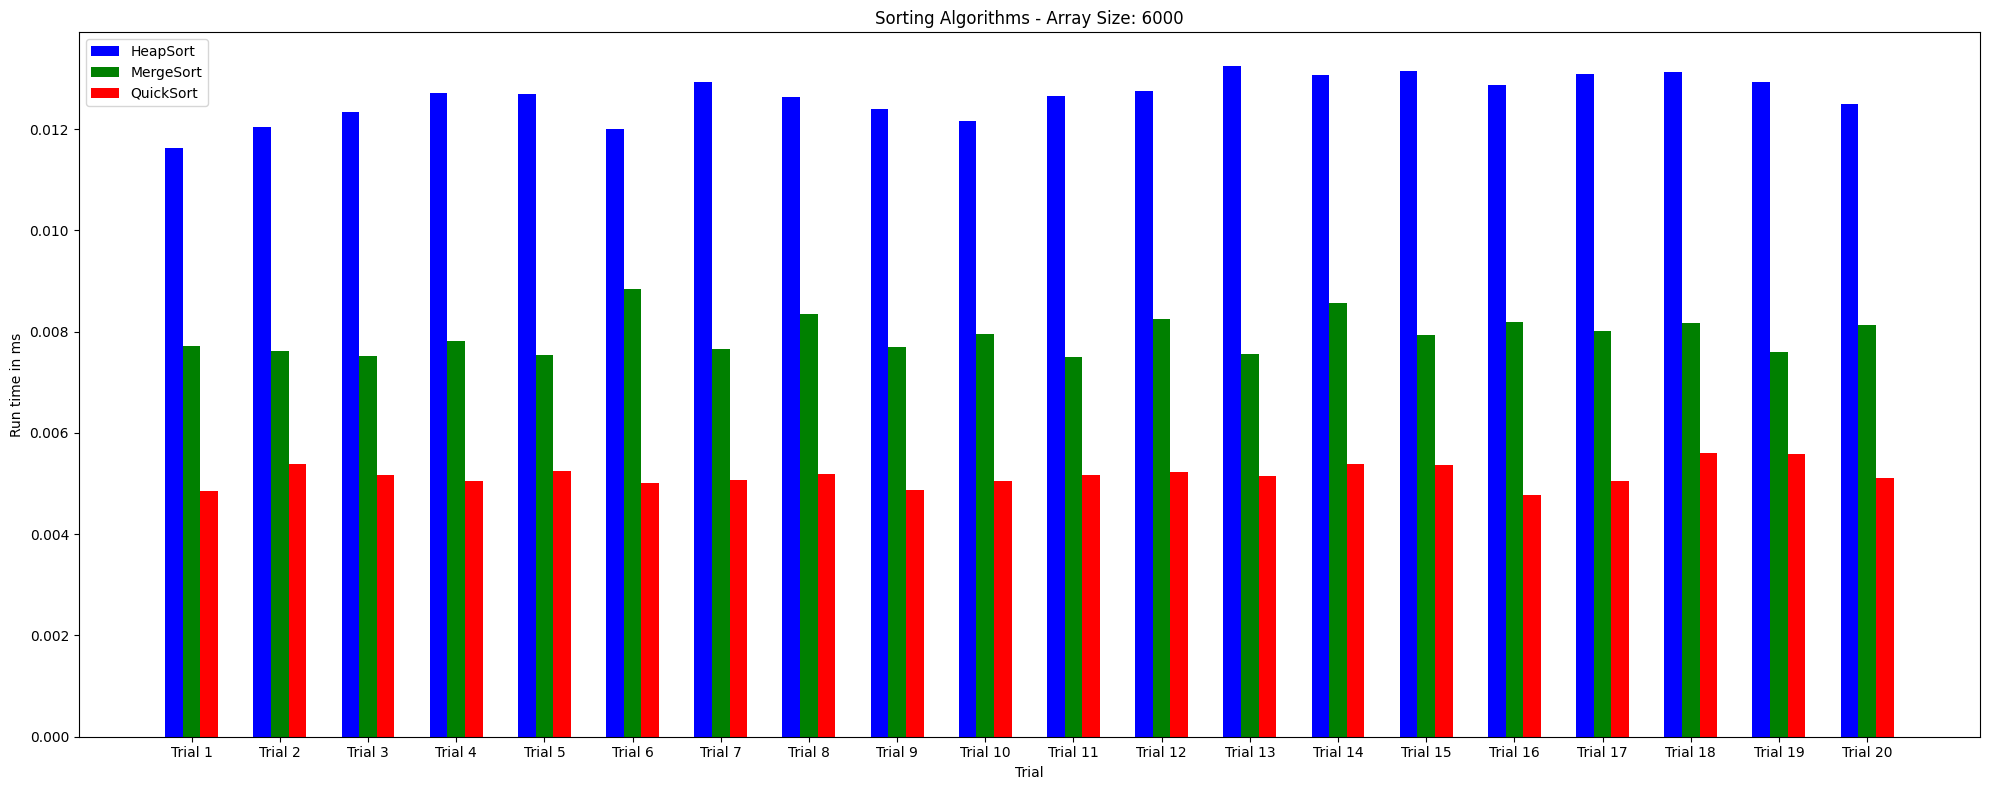

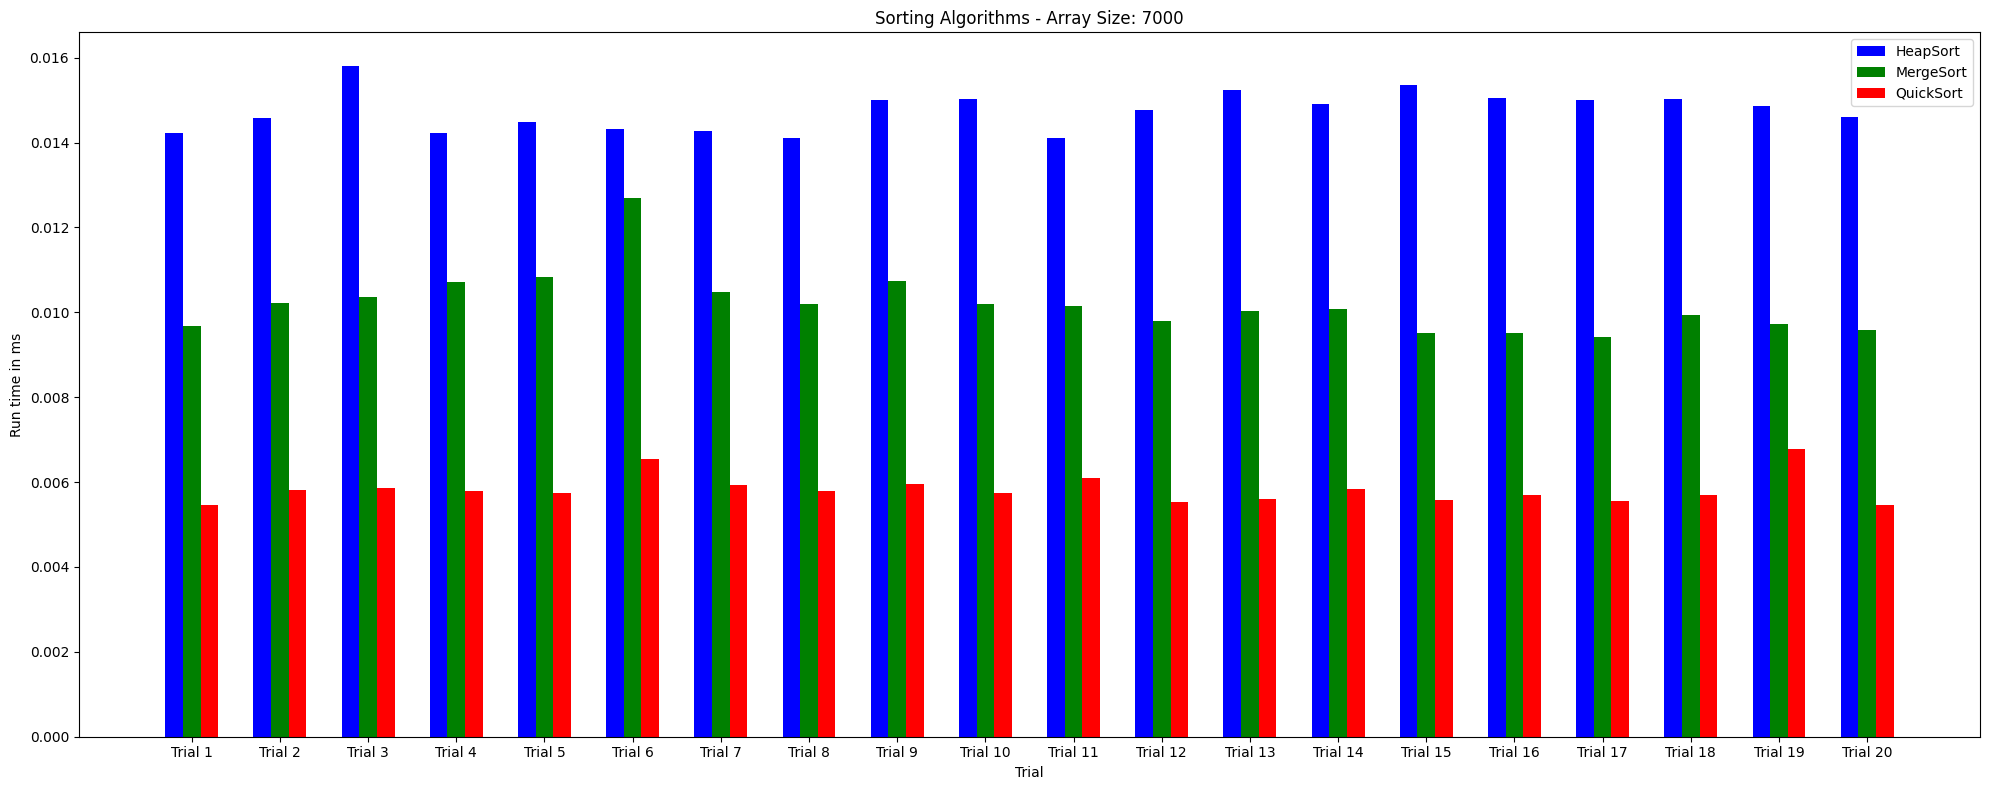

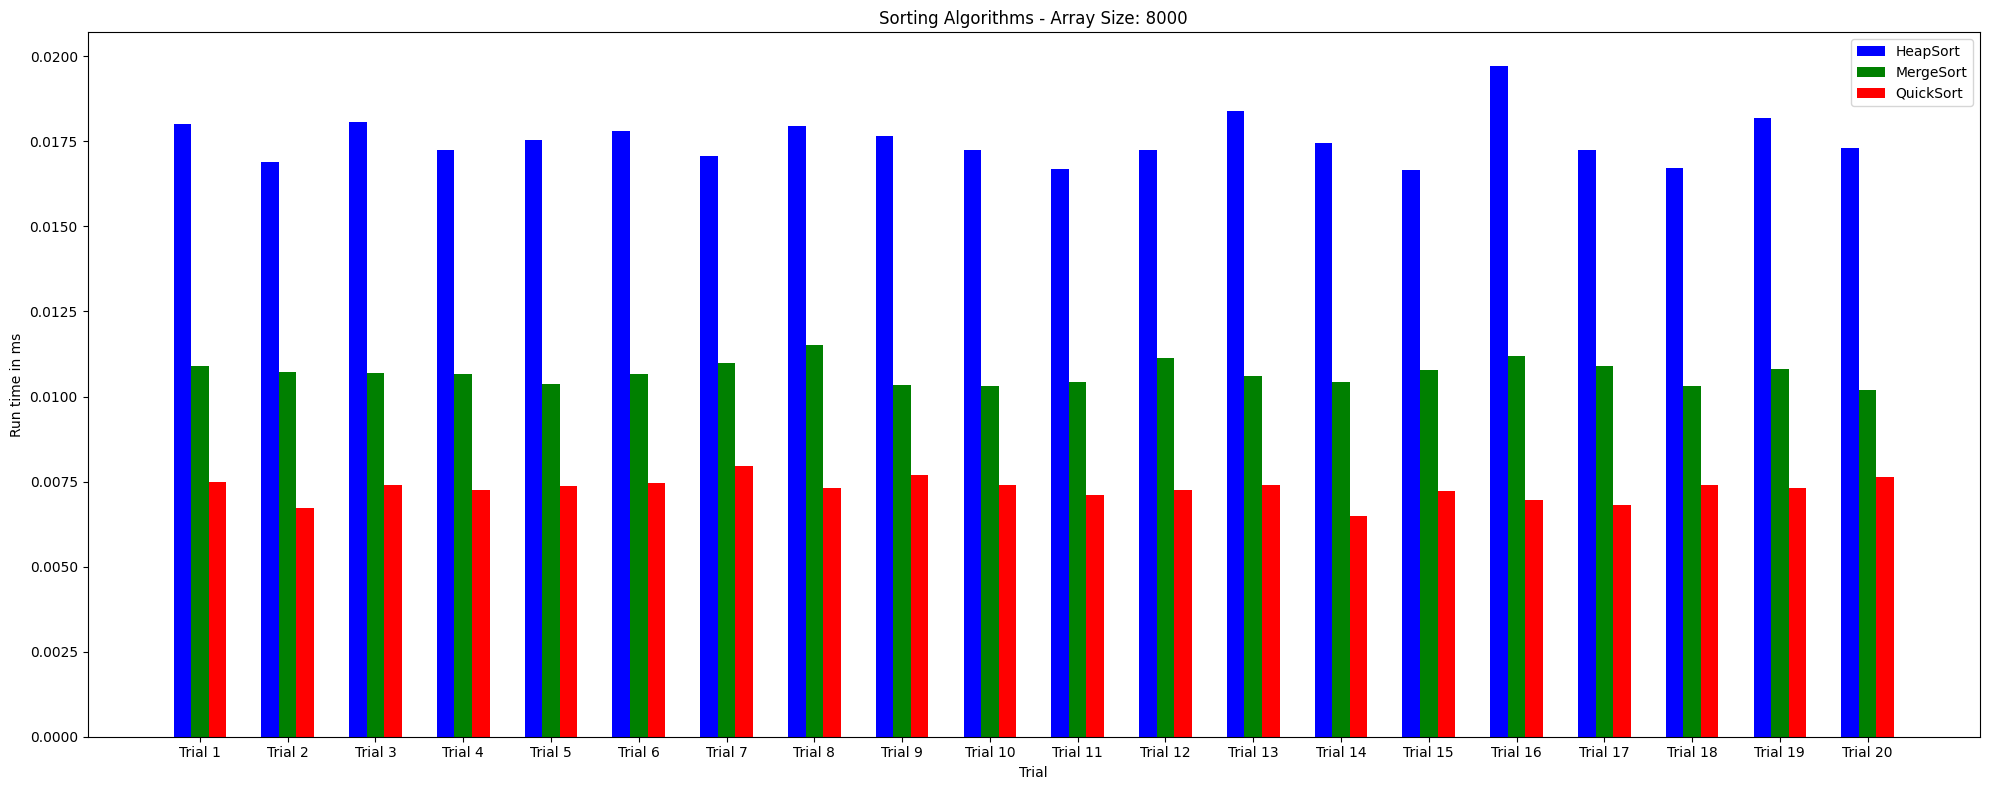

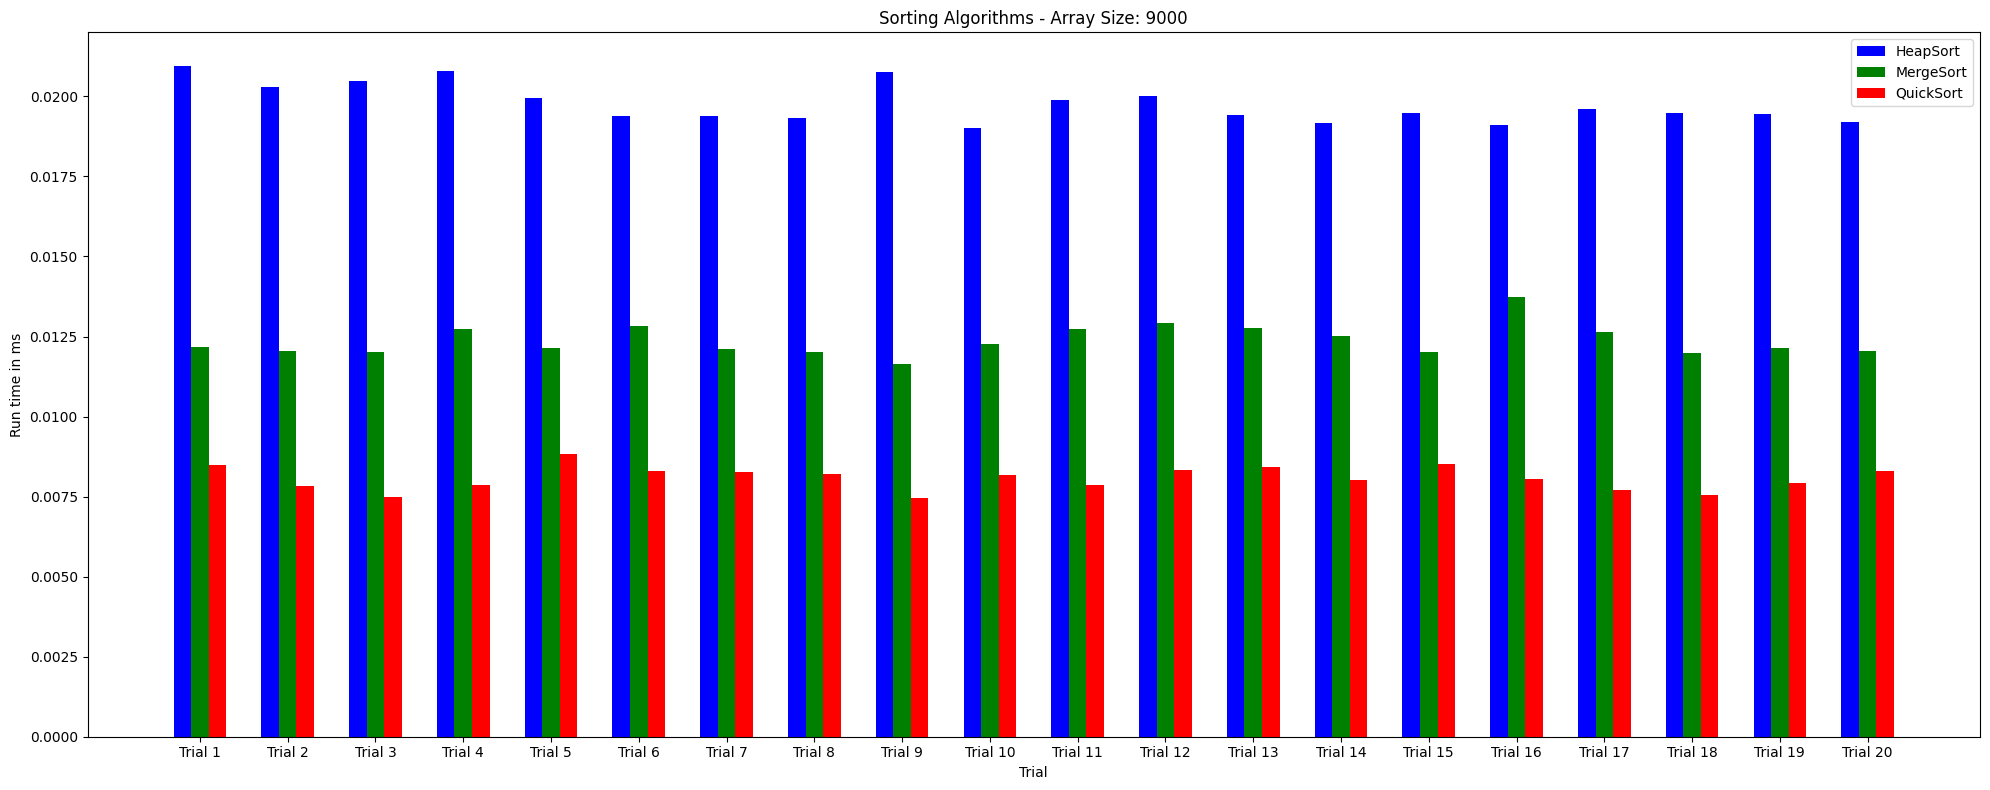

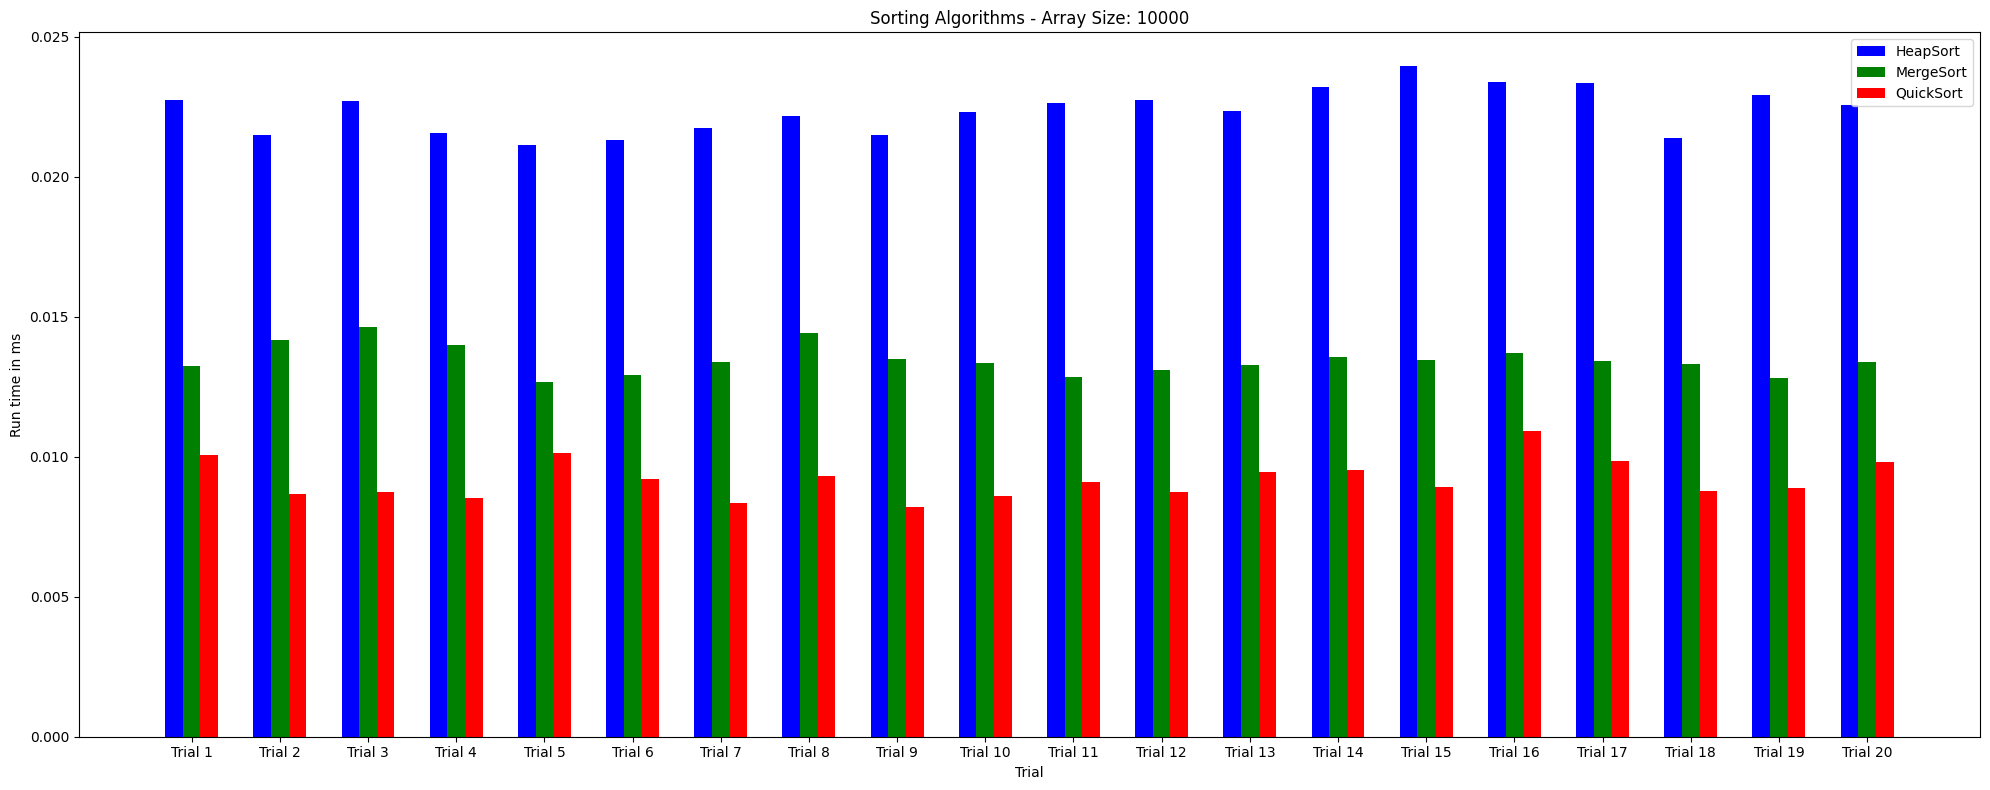

In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt


# (Your heapSort, mergeSort, and quickSort function definitions go here)
#I created a new draw_plot inorder to show all of these algorithms in one plot
def draw_plot(results, title):
    n_groups = len(results['QuickSort'])
    fig, ax = plt.subplots(figsize=(20, 8))

    # Calculate the width of each bar group
    bar_width = 0.2
    index = np.arange(n_groups)
    
    # Plotting each set of bars
    plt.bar(index - bar_width, results['HeapSort'], bar_width, color='blue', label='HeapSort')
    plt.bar(index, results['MergeSort'], bar_width, color='green', label='MergeSort')
    plt.bar(index + bar_width, results['QuickSort'], bar_width, color='red', label='QuickSort')
    
    # Add some text for labels, title, and axes ticks
    plt.xlabel('Trial')
    plt.ylabel('Run time in ms')
    plt.title(title)
    plt.xticks(index, [f'Trial {i+1}' for i in range(n_groups)])
    plt.legend()

    # Tweak spacing to prevent clipping of ylabel
    plt.tight_layout()
    plt.show()

def run_sorting_algorithm(sorting_instance, sort_method, data):
    start_time = time.time()
    if sort_method == sorting_instance.quickSort:
        sort_method(data, 0, len(data) - 1)
    else:
        sort_method(data)
    return time.time() - start_time

def experiment(sorting_instance, sort_method, size, num_trials):
    trial_times = []
    for _ in range(num_trials):
        data = create_custom_list(size, 1000)
        trial_time = run_sorting_algorithm(sorting_instance, sort_method, data.copy())
        trial_times.append(trial_time)
    return trial_times



sorting_instance = SortingAlgorithms()

array_sizes = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
num_trials = 20
sorting_methods = {'HeapSort': sorting_instance.heapSort, 'MergeSort': sorting_instance.mergeSort, 'QuickSort': sorting_instance.quickSort}
alg_results = {method: {size: [] for size in array_sizes} for method in sorting_methods}

for size in array_sizes:
    for method_name, sort_method in sorting_methods.items():
        alg_results[method_name][size] = experiment(sorting_instance, sort_method, size, num_trials)

# Plot the results for each size
for size in array_sizes:
    results = {method: alg_results[method][size] for method in sorting_methods}
    draw_plot(results, f"Sorting Algorithms - Array Size: {size}")


## Experiment 2: Analyzing Average Run Times of Sorting Algorithms

### Objective
The second experiment focuses on calculating and comparing the average run times of HeapSort, MergeSort, and QuickSort across the same array sizes used in Experiment 1.

### Methodology
Using similar array sizes and trial counts, we measure the execution time for each sorting operation, repeat this process multiple times for each array size, and calculate the average run time.

### Implementation

#### Timing and Averaging
- `run_sorting_algorithm(sort_func, data)`: Times the sorting process for each algorithm.
- `calculate_average_times(results)`: Calculates the average run time for each sorting algorithm at each array size.

#### Visualization
The `draw_line_graph` function plots a line graph to represent the average run times, offering a clear comparison across different array sizes.


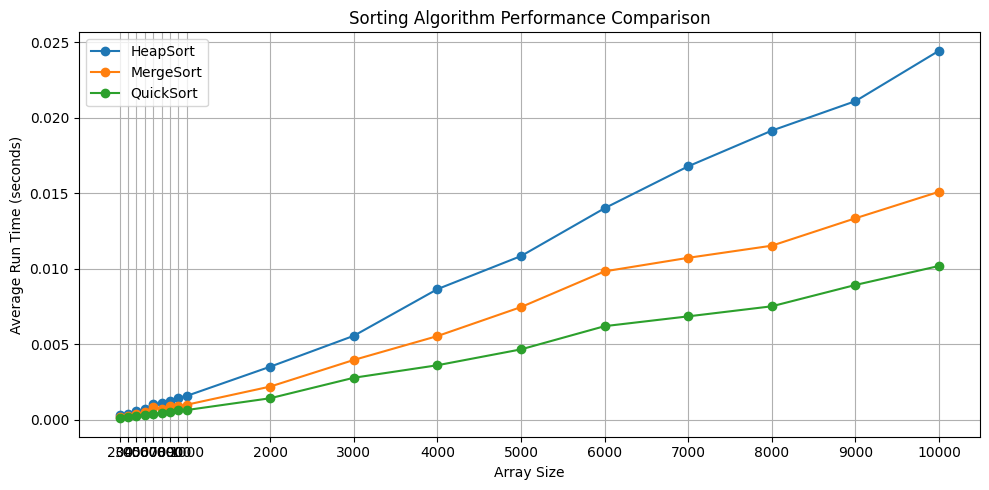

In [8]:
def run_sorting_algorithm(sorting_instance, sort_method, data):
    start_time = time.time()
    if sort_method == sorting_instance.quickSort:
        sort_method(data, 0, len(data) - 1)
    else:
        sort_method(data)
    return time.time() - start_time

def calculate_average_times(results):
    average_times = {}
    for alg_name, times in results.items():
        average_times[alg_name] = [np.mean(time_list) for time_list in times.values()]
    return average_times

def draw_line_graph(average_times, array_sizes):
    plt.figure(figsize=(10, 5))
    for alg_name, times in average_times.items():
        plt.plot(array_sizes, times, marker='o', label=alg_name)
    plt.xlabel('Array Size')
    plt.ylabel('Average Run Time (seconds)')
    plt.title('Sorting Algorithm Performance Comparison')
    plt.xticks(array_sizes)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main execution
array_sizes = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
num_trials = 10
sorting_instance = SortingAlgorithms()
sorting_methods = {'HeapSort': sorting_instance.heapSort, 'MergeSort': sorting_instance.mergeSort, 'QuickSort': sorting_instance.quickSort}
alg_results = {method: {} for method in sorting_methods}

# Running the experiment
for size in array_sizes:
    for method_name, sort_method in sorting_methods.items():
        run_times = []
        for _ in range(num_trials):
            data = create_custom_list(size, 1000)
            time_taken = run_sorting_algorithm(sorting_instance, sort_method, data.copy())
            run_times.append(time_taken)
        alg_results[method_name][size] = run_times

# Calculate average run times
average_times = calculate_average_times(alg_results)

# Draw the line graph
draw_line_graph(average_times, array_sizes)

## Experiment 3: Detailed Analysis of Sorting Algorithm Efficiency

### Objective
The aim of the third experiment is to delve deeper into the performance metrics of HeapSort, MergeSort, and QuickSort. We aim to measure, compare, and visualize the average run times of these sorting algorithms across varied array sizes, to deduce their efficiency and scalability.

### Methodology
The experiment is conducted by performing the following steps for each algorithm:

- Run the sorting algorithm multiple times across different array sizes.
- Measure the execution time for each run.
- Calculate the average run time across trials for each array size.

### Implementation

#### Timing and Averaging Functions
- `run_sorting_algorithm(sort_func, data)`: Executes the sorting algorithm and times the operation.
- `calculate_average_times(results)`: Computes the average execution time of the sorting algorithm across all trials for each array size.

#### Visualization Functions
- `draw_plot(timings, algorithm_name)`: Produces a bar chart to display the average execution time for each batch of the sorting process, along with a horizontal line representing the overall average time.
- `draw_line_chart(x, y, title, avg_time)`: Generates a line graph to illustrate the average run times, offering a visual comparison of algorithm performance over incremental array sizes.

#### Experiment Execution
For each sorting algorithm, the following processes are executed:

- `sort_experiment(sort_function, N, list_length, max_value)`: Administers the batch sorting experiment, logging execution times and averaging them.
- `size_experiment(sort_function, max_list_size, max_value)`: Executes the sorting algorithm on arrays of increasing sizes to assess scalability and records the run times.

```python
# Code for running the experiments and plotting results
N = 10000
list_length = 1000
max_value = 1000

# Iterate over each sorting algorithm to perform experiments
for sort_function in [mergeSort, quickSort, heapSort]:
    sort_experiment(sort_function, N, list_length, max_value)
    size_experiment(sort_function, 1000, max_value)


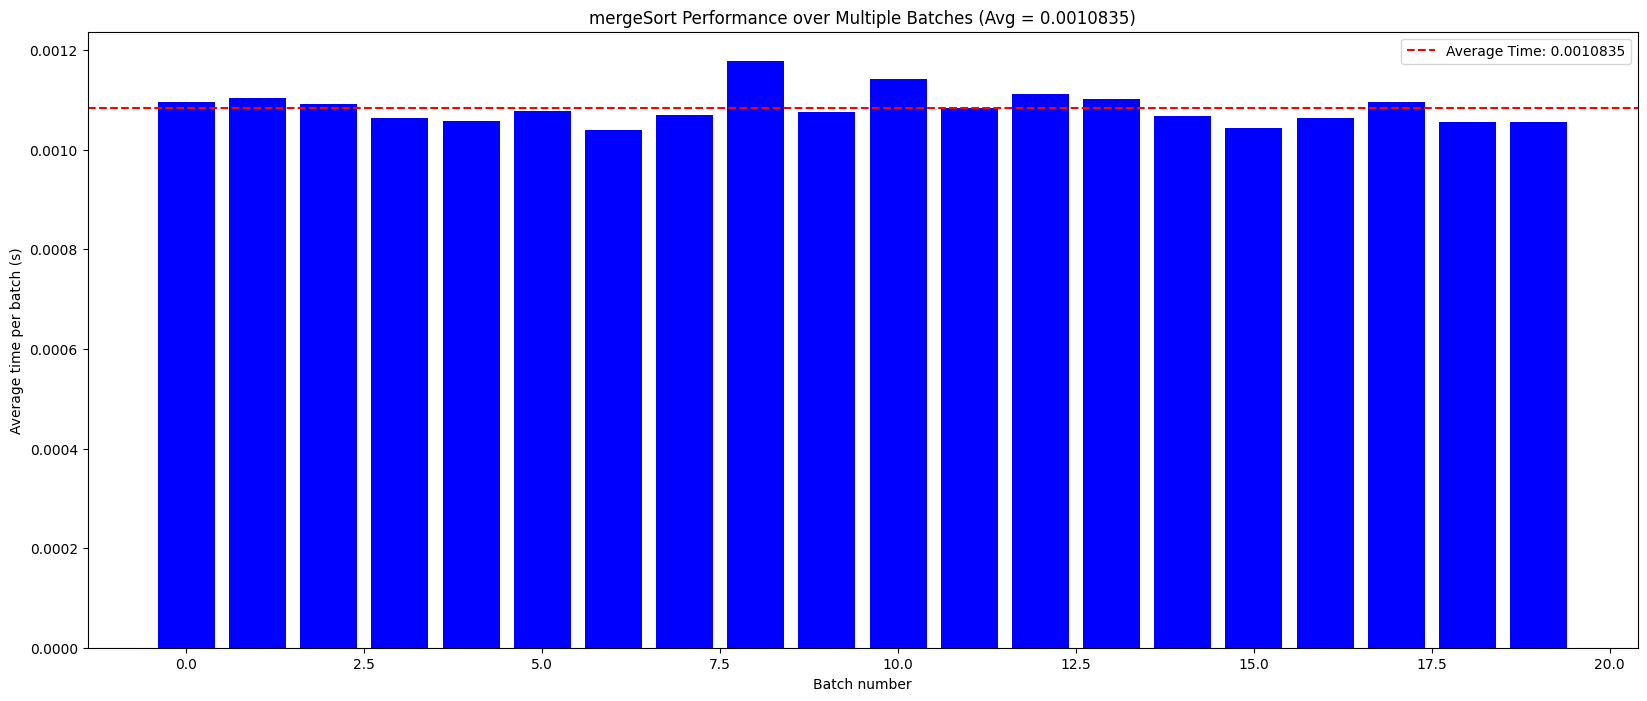

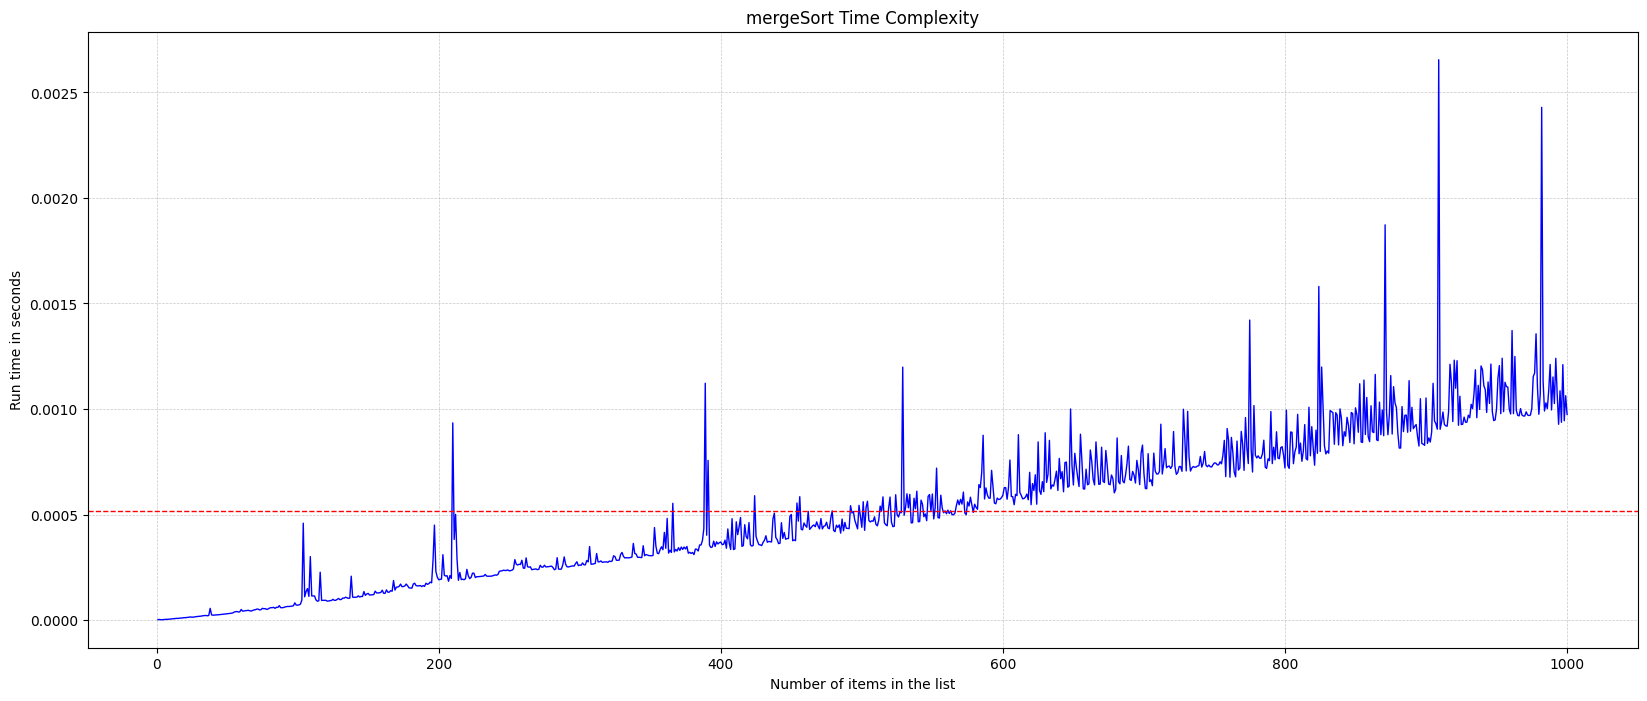

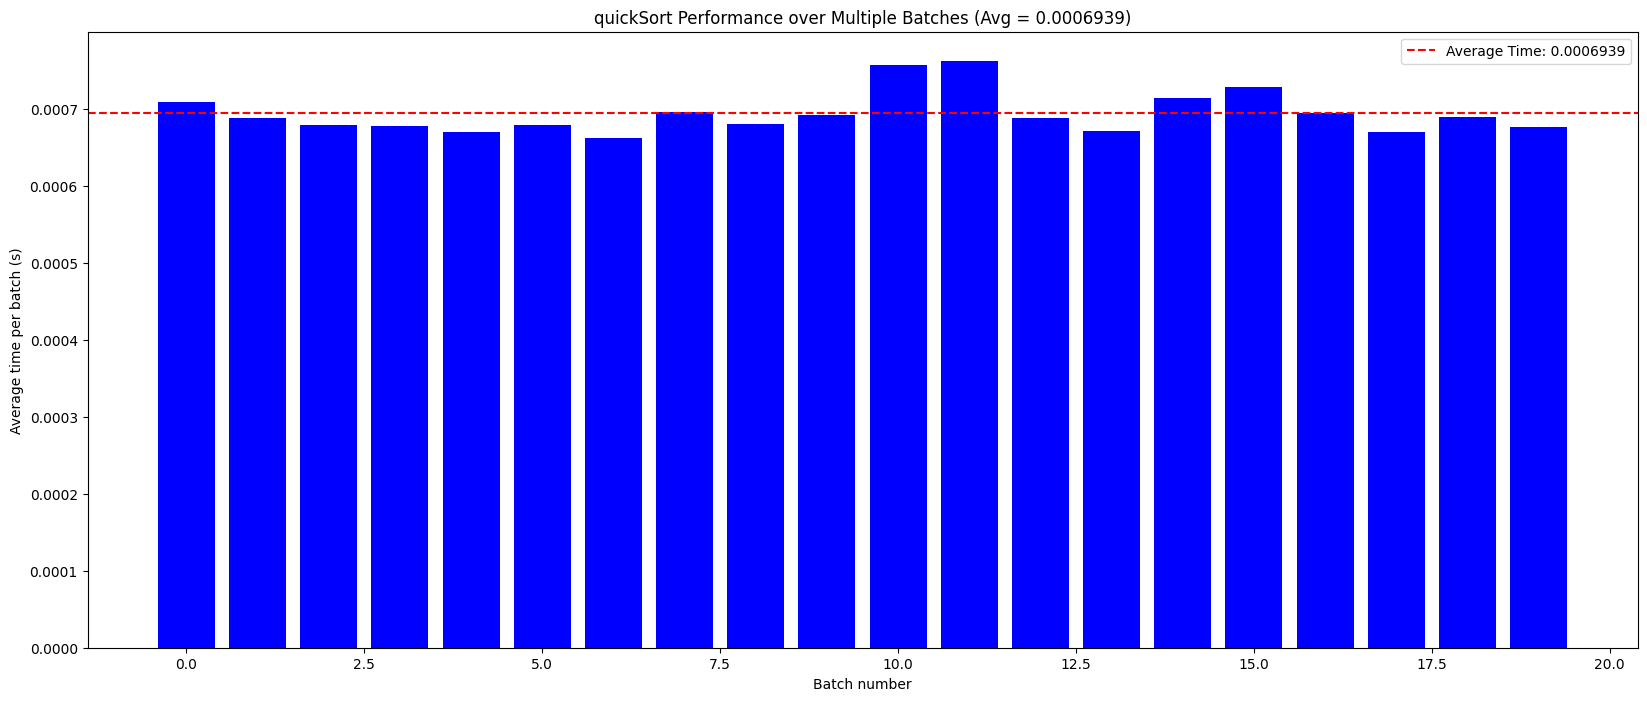

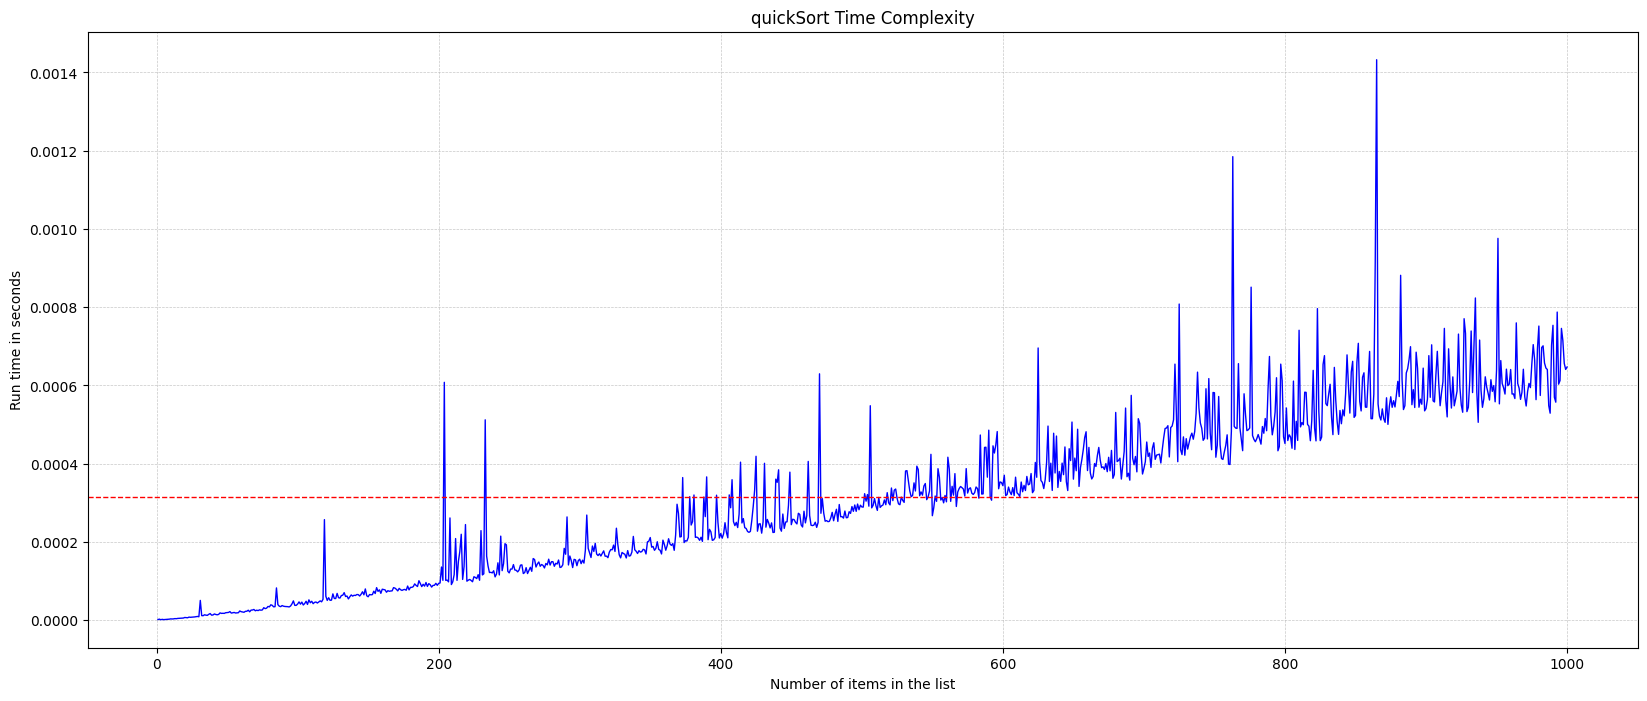

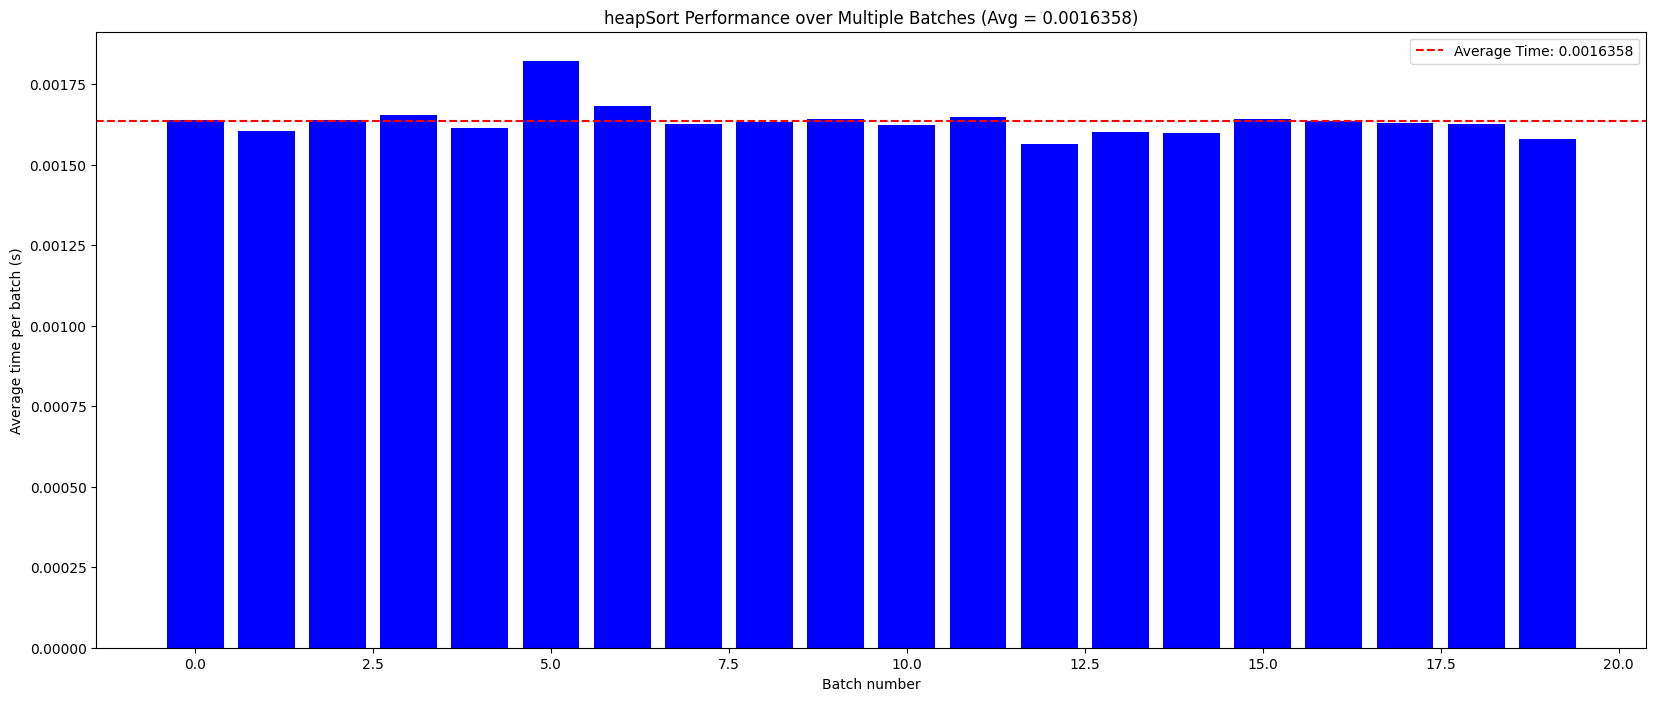

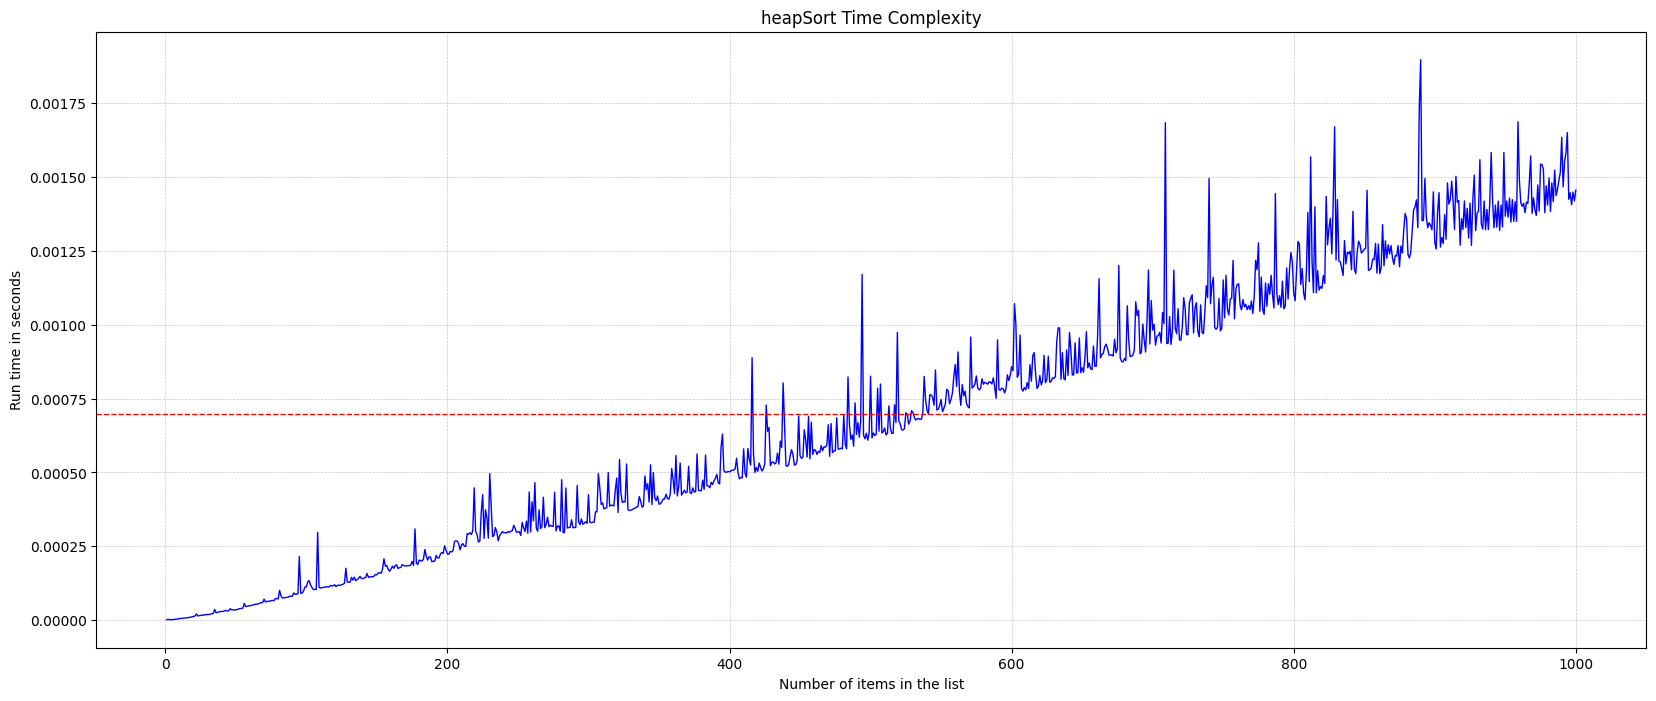

In [9]:
#I created a new draw_plot inorder to show sorting algorithms in different plots
def draw_plot(timings, algorithm_name):
    avg_time = np.mean(timings)
    plt.figure(figsize=(20, 8))
    plt.bar(range(len(timings)), timings, color='blue')
    plt.axhline(y=avg_time, color='red', linestyle='dashed', label=f'Average Time: {avg_time:.7f}')
    plt.xlabel('Batch number')
    plt.ylabel('Average time per batch (s)')
    plt.title(f'{algorithm_name} Performance over Multiple Batches (Avg = {avg_time:.7f})')
    plt.legend()
    plt.show()

def draw_line_chart(x, y, title, avg_time):
    plt.figure(figsize=(20, 8))
    
   
    plt.plot(x, y, color='blue', linewidth=1.0) 

    plt.axhline(y=avg_time, color='red', linestyle='dashed', linewidth=1.0, label=f'Average Time: {avg_time:.7f}')
    
    plt.xlabel('Number of items in the list')
    plt.ylabel('Run time in seconds')  
    plt.title(title)
    
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    plt.show()

def sort_experiment(sorting_instance, sort_method, N, list_length, max_value):
    timings = []

    batches = N // 500
    for _ in range(batches):
        batch_timings = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            if sort_method.__name__ == 'quickSort':
                sort_method(custom_list, 0, len(custom_list) - 1)
            else:
                sort_method(custom_list)
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings.append(execution_time)
        
        average_time = np.mean(batch_timings)
        timings.append(average_time)
    
    draw_plot(timings, sort_method.__name__)

def size_experiment(sorting_instance, sort_method, max_list_size, max_value):
    list_sizes = list(range(1, max_list_size + 1))
    timings = []
    for size in list_sizes:
        custom_list = create_custom_list(size, max_value)
        start_time = time.time()
        if sort_method.__name__ == 'quickSort':
            sort_method(custom_list, 0, len(custom_list) - 1)
        else:
            sort_method(custom_list)
        end_time = time.time()
        execution_time = end_time - start_time
        timings.append(execution_time)
    
    avg_time = np.mean(timings)
    draw_line_chart(list_sizes, timings, f'{sort_method.__name__} Time Complexity', avg_time)

# Main execution
N = 10000
list_length = 1000
max_value = 1000
sorting_instance = SortingAlgorithms()

# Run experiments for each sorting method
for sort_method in [sorting_instance.mergeSort, sorting_instance.quickSort, sorting_instance.heapSort]:
    sort_experiment(sorting_instance, sort_method, N, list_length, max_value)
    size_experiment(sorting_instance, sort_method, 1000, max_value)

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

# Detailed Outline of Sorting Algorithm Experiments

## Experiment Overview

We conducted a series of experiments to evaluate the performance of three classic sorting algorithms: HeapSort, MergeSort, and QuickSort. These experiments aimed to understand how the execution time of these algorithms varies with the size of the input array and to compare their average run times.

### Experiment 1: Performance Comparison

#### Setup
- **Algorithms**: HeapSort, MergeSort, QuickSort
- **Array Sizes**: Arrays with lengths ranging from 200 to 10,000 elements.
- **Number of Runs**: Each sorting operation was repeated multiple times for accuracy.
- **Data Generation**: Random arrays of integers were generated for each run.

#### Results
- **Plot Type**: Bar graph
- **Displayed Metrics**: Run times for each algorithm at each array size.

### Experiment 2: Average Run Time Analysis

#### Setup
- **Algorithms**: HeapSort, MergeSort, QuickSort
- **Array Sizes**: Arrays with lengths ranging from 200 to 10,000 elements.
- **Number of Runs**: Each sorting operation was repeated multiple times for accuracy.
- **Data Generation**: Random arrays of integers were generated for each run.

#### Results
- **Plot Type**: Line graph
- **Displayed Metrics**: Average run times across all runs for each array size.

### Experiment 3: Scalability and Efficiency

#### Setup
- **Algorithms**: HeapSort, MergeSort, QuickSort
- **Array Sizes**: Gradually increased the array size from 1 to 1,000 elements to observe the incremental performance.
- **Number of Runs**: Conducted extensive trials at each array size to ensure reliability of the results.
- **Data Generation**: Randomized arrays of integers were generated for each trial to simulate varied data scenarios.

#### Results
- **Plot Type**: Line graph
- **Displayed Metrics**: Average run times were plotted to show the trend as array sizes increased, providing an insight into how each algorithm's efficiency scales.

## Discussion and Conclusion

### Findings
- Experiments 1 and 2 laid the foundation for direct performance comparisons and average efficiency analysis across different array sizes.
- Experiment 3 extended these insights by focusing on the scalability of the algorithms, revealing how each one adapts to incremental increases in data size.

### Conclusions
- **HeapSort**: HeapSort was one of the slowest sort amoung the 3 sorts , 
- **MergeSort**: [Detailed conclusion about MergeSort's scalability and efficiency]
- **QuickSort**: [Detailed conclusion about QuickSort's scalability and efficiency]
- The collective results from these experiments elucidate the trade-offs and efficiency differences among the algorithms, serving as a comprehensive guide for selecting the appropriate sorting algorithm based on varying data sizes and performance requirements.


---
---

### PART E

E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.

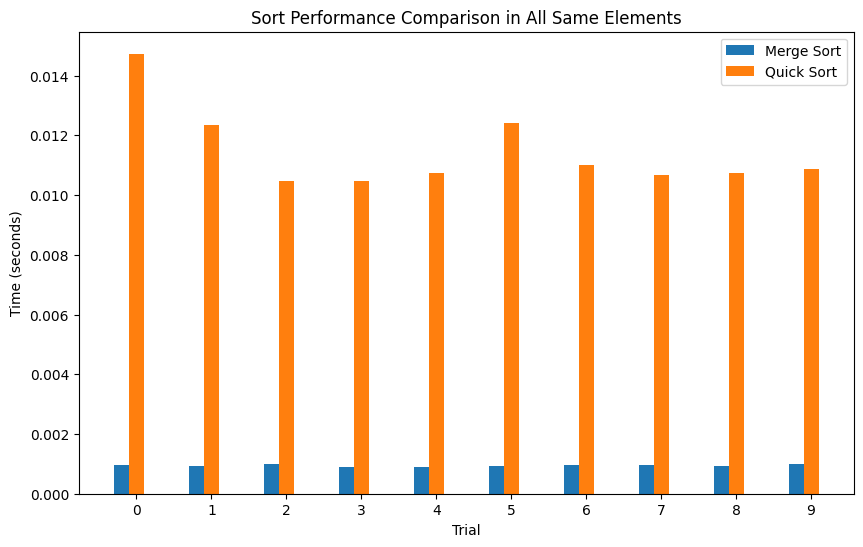

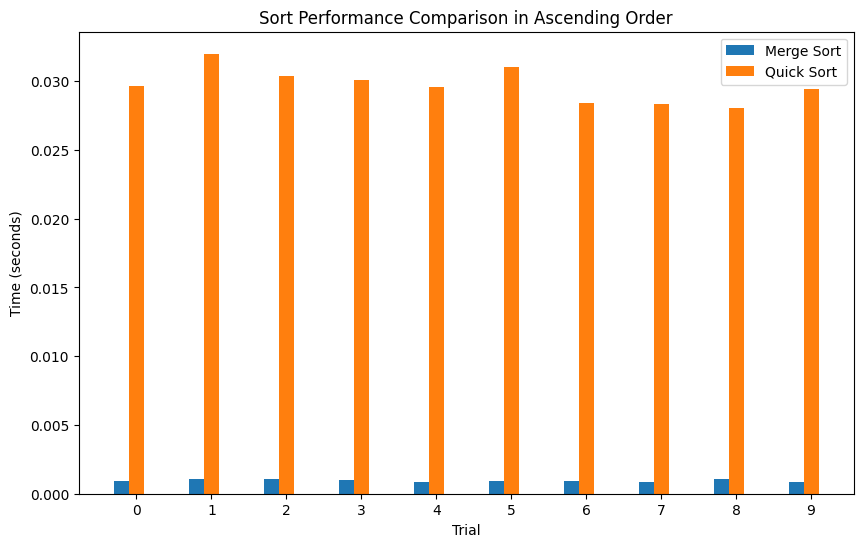

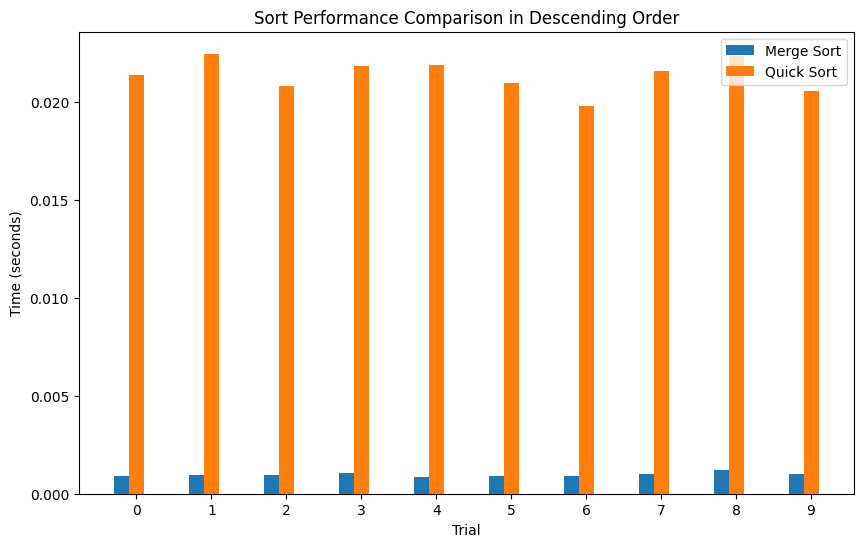

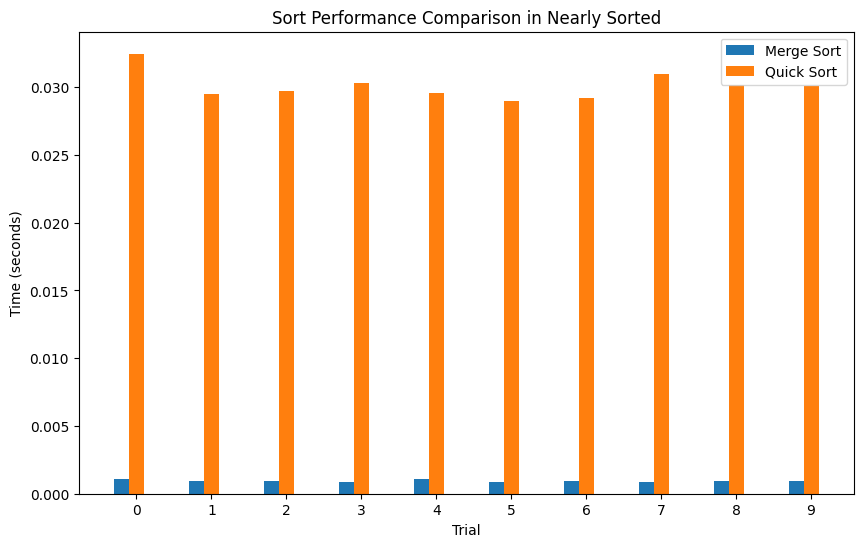

In [11]:


def create_scenario_array(size, scenario):
    if scenario == 'All Same Elements':
        return [1] * size
    elif scenario == 'Ascending Order':
        return list(range(size))  # Workaround for list(range(size))
    elif scenario == 'Descending Order':
        return [i for i in range(size, 0, -1)]  # Workaround for list(range(size, 0, -1))
    elif scenario == 'Nearly Sorted':
        arr = [i for i in range(size)]  # Workaround
        arr[-1], arr[-2] = arr[-2], arr[-1]  # Swap last two elements
        return arr
    else:
        raise ValueError(f"Unknown scenario: {scenario}")



def run_sorting_algorithm(sorting_instance, sort_method, data):
    start_time = time.time()
    if sort_method == sorting_instance.quickSort:
        sort_method(data, 0, len(data) - 1)
    else:
        sort_method(data)
    return time.time() - start_time

def run_experiment(sorting_instance, array_size, num_trials, scenario):
    merge_sort_times = []
    quick_sort_times = []
    for _ in range(num_trials):
        data = create_scenario_array(array_size, scenario)
        merge_sort_times.append(run_sorting_algorithm(sorting_instance, sorting_instance.mergeSort, data.copy()))
        quick_sort_times.append(run_sorting_algorithm(sorting_instance, sorting_instance.quickSort, data.copy()))
    
    return merge_sort_times, quick_sort_times, heap_sort_times

def plot_results(merge_sort_times, quick_sort_times, scenario):
    x = np.arange(len(merge_sort_times))

    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, merge_sort_times, width=0.2, label='Merge Sort')
    plt.bar(x, quick_sort_times, width=0.2, label='Quick Sort')
    plt.xlabel('Trial')
    plt.ylabel('Time (seconds)')
    plt.title(f'Sort Performance Comparison in {scenario}')
    plt.xticks(x)
    plt.legend()
    plt.show()

# Main execution
sorting_instance = SortingAlgorithms()
array_size = 1000
num_trials = 10
scenarios = ['All Same Elements', 'Ascending Order', 'Descending Order', 'Nearly Sorted']

for scenario in scenarios:
    merge_sort_times, quick_sort_times, heap_sort_times = run_experiment(sorting_instance, array_size, num_trials, scenario)
    plot_results(merge_sort_times, quick_sort_times, scenario)


In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---

E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart. 

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort. 

HINT: This will be a threshold at which the quick sort algorithm picks up again.


In [79]:
def quickSortIterativeSwaps(arr, l, h):
    size = h - l + 1
    stack = [0] * size
    top = -1

    top += 1
    stack[top] = l
    top += 1
    stack[top] = h

    swap_count = 0

    while top >= 0:
        h = stack[top]
        top -= 1
        l = stack[top]
        top -= 1

        p, swaps = partitionSwaps(arr, l, h)
        swap_count += swaps

        if p-1 > l:
            top += 1
            stack[top] = l
            top += 1
            stack[top] = p - 1

        if p+1 < h:
            top += 1
            stack[top] = p + 1
            top += 1
            stack[top] = h

    return swap_count

def partitionSwaps(arr, low, high):
    pivot = arr[high]
    i = low - 1
    swaps = 0

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            swaps += 1

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    swaps += 1
    return i + 1, swaps


def create_scenario_array(size, scenario):
    if scenario == 'Average':
        return [random.randint(0, size) for _ in range(size)]
    elif scenario == 'Worst':
        return [i for i in range(size, 0, -1)] 



def run_experiment(sort_func, array_size, scenario):
    data = create_scenario_array(array_size, scenario)
    start_time = time.time()
    if sort_func == quickSortIterativeSwaps:
        swap_count = sort_func(data, 0, len(data) - 1)
    else:
        sort_func(data)
    end_time = time.time()
    return end_time - start_time, swap_count if sort_func == quickSortIterativeSwaps else None

def plot_results(merge_sort_results, quick_sort_results, scenarios):
    x = range(len(scenarios))
    plt.figure(figsize=(10, 6))

    merge_sort_results_ms = [time * 1000 for time in merge_sort_results]
    quick_sort_results_ms = [time * 1000 for time in quick_sort_results]

    plt.bar(x, merge_sort_results_ms, width=0.4, label='Merge Sort', align='center')
    plt.bar(x, quick_sort_results_ms, width=0.4, label='Quick Sort', align='edge')

    plt.xlabel('Scenario')
    plt.ylabel('Time (milliseconds)')
    plt.yscale('log')  # Using logarithmic scale
    plt.title('Performance Comparison')
    plt.xticks(x, scenarios)
    plt.legend()
    plt.grid(True)
    plt.show()


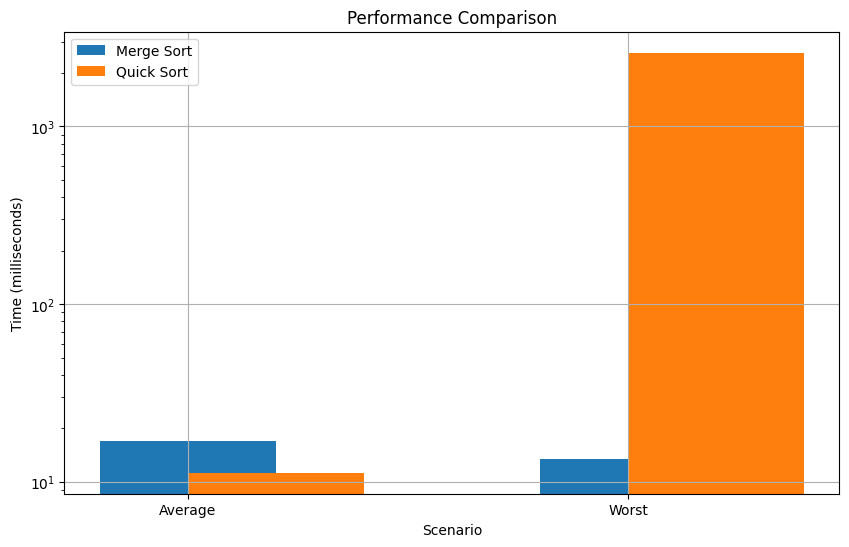

Swap counts for Quick Sort: [85927, 25004999]


In [80]:
#Experiment for worst and average case of Quick Sort and Merge Sort

array_size = 10000
scenarios = ['Average', 'Worst']
merge_sort_results = []
quick_sort_results = []
swap_counts = []

for scenario in scenarios:
    time_taken, _ = run_experiment(mergeSort, array_size, scenario)
    merge_sort_results.append(time_taken)

    time_taken, swaps = run_experiment(quickSortIterativeSwaps, array_size, scenario)
    quick_sort_results.append(time_taken)
    swap_counts.append(swaps)

plot_results(merge_sort_results, quick_sort_results, scenarios)
print("Swap counts for Quick Sort:", swap_counts)





In this section, provide a detailed outline of:
- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.

**Reflection**:

---
---

### PART F

Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:
- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important. 

HINT: Can you create some sort of "hybrid" sort that would be better?

In [81]:
def insertionSort(arr):
    """Sorts an array using the insertion sort algorithm."""
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


def run_sorting_experiment(sort_func, data):
    """Runs a single sorting experiment and measures execution time."""
    start_time = time.time()
    sort_func(data)
    return time.time() - start_time

def create_nearly_sorted_array(size):
    """Creates a nearly sorted array of a given size."""
    arr = [i for i in range(size)]  # Using a generator expression
    arr[-1], arr[-2] = arr[-2], arr[-1]  # Swap last two elements
    return arr

def execute_experiments(sorting_algorithms, list_lengths, num_trials):
    """Executes sorting experiments for each algorithm and returns results."""
    results = {alg: [] for alg in sorting_algorithms}
    for length in list_lengths:
        for alg_name, sort_func in sorting_algorithms.items():
            avg_time = np.mean([run_sorting_experiment(sort_func, create_nearly_sorted_array(length)) for _ in range(num_trials)])
            results[alg_name].append(avg_time)
    return results


list_lengths = [50, 75, 100, 200, 600, 800, 1000]
num_trials = 100
sorting_algorithms = {'InsertionSort': insertionSort, 'HeapSort': heapSort, 'MergeSort': mergeSort}

results = execute_experiments(sorting_algorithms, list_lengths, num_trials)


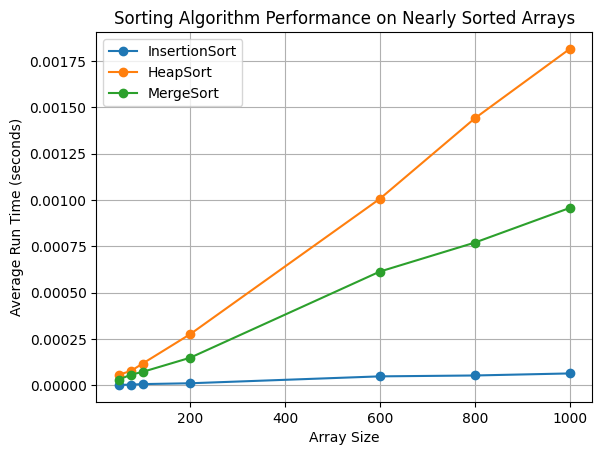

In [82]:
# Experiments for nearly sorted arrays

for alg_name, times in results.items():
    plt.plot(list_lengths, times, marker='o', label=alg_name)

plt.xlabel('Array Size')
plt.ylabel('Average Run Time (seconds)')
plt.title('Sorting Algorithm Performance on Nearly Sorted Arrays')
plt.legend()
plt.grid(True)
plt.show()


**Reflection**:

---
---

**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

### Ankur Pandey (pandea23) = Part A and B 
### Aarav Pant (panta3) = Part C and D
### Megh Joshi (joshim20) = Part E and F

---
---